# Libraries

### General Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import re

### Audio Analyzing

In [2]:
import librosa
import librosa.display

### CNN Libraries

In [3]:
# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Data

### Path for Data

In [4]:
RAVDESS = 'RAVDESS'
TESS = "TESS Toronto emotional speech set data"
SAVEE = "ALL/"
CREMA = 'AudioWAV/'

### Ravdess Dataset

In [5]:
import os

file_emotion = []
file_path = []

ravdess_directory_list = os.listdir(RAVDESS)

for i in ravdess_directory_list:
    actor_dir = os.path.join(RAVDESS, i)
    actor = os.listdir(actor_dir)

    for f in actor:
        part = f.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(actor_dir, f).replace('\\', '/'))


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'},
                            inplace=True)

print(ravdess_df.Emotions.value_counts())


Emotions
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_5668\3710592250.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'},


C:\Users\user\AppData\Local\Temp\ipykernel_5668\506718871.py:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.countplot(data=ravdess_df, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])


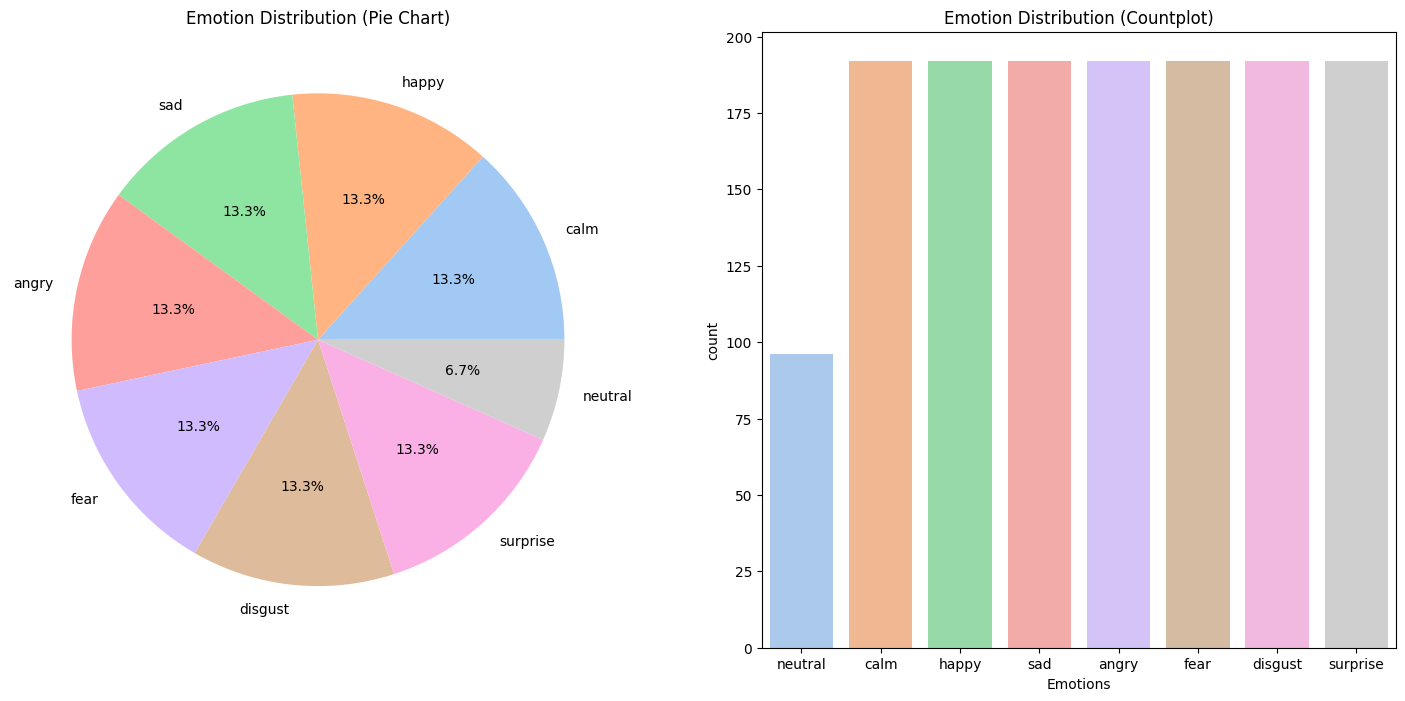

In [6]:
colors = sns.color_palette('pastel')
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
ravdess_df['Emotions'].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%', colors=colors)
ax[0].set_ylabel('')
ax[0].set_title('Emotion Distribution (Pie Chart)')

# Countplot
sns.countplot(data=ravdess_df, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])
ax[1].set_title('Emotion Distribution (Countplot)')

plt.show()

### TESS Dataset

In [7]:
import os

tess_directory_list = os.listdir(TESS)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    full_dir_path = os.path.join(TESS, dir)
    directories = os.listdir(full_dir_path)
    for file in directories:
        full_file_path = os.path.join(full_dir_path, file)
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(full_file_path.replace('\\', '/'))  # Replace backslashes with forward slashes

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_5668\2877084828.py:11: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(data=Tess_df, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])


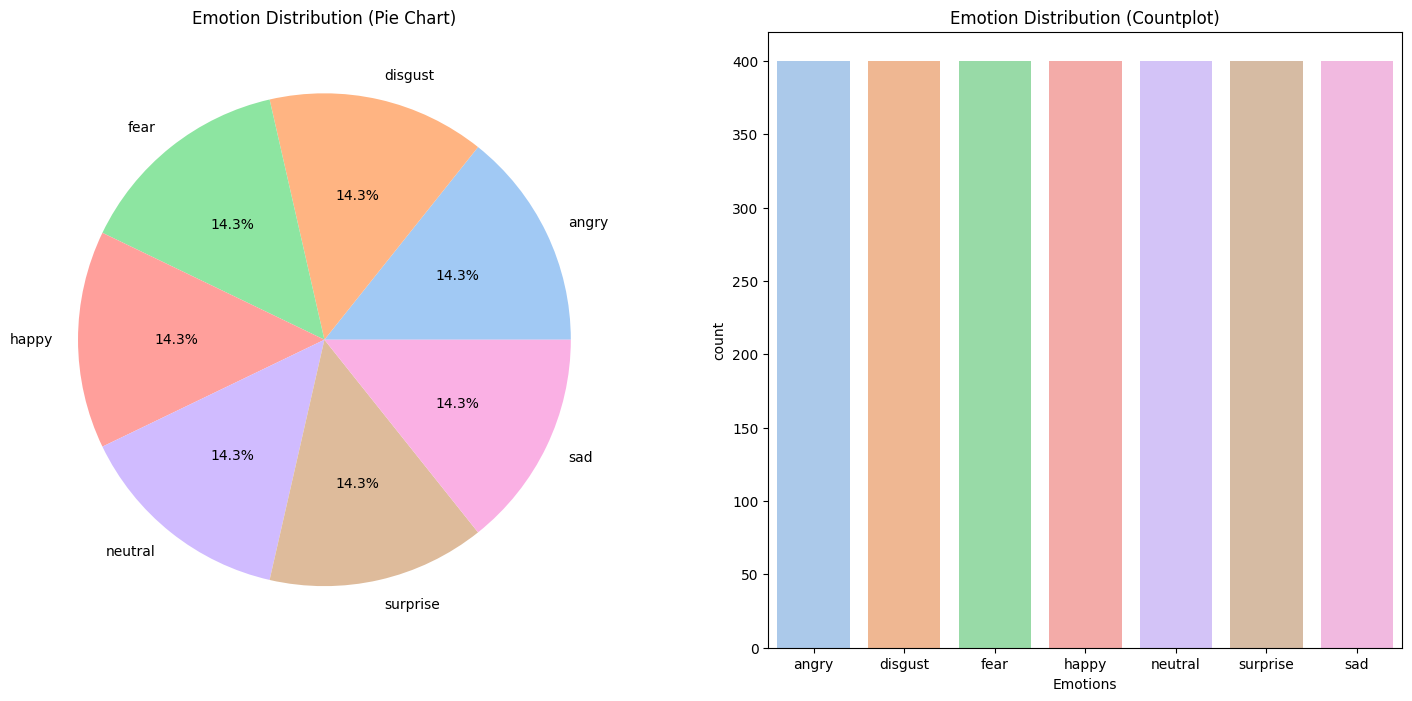

In [8]:
colors = sns.color_palette('pastel')
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
Tess_df['Emotions'].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%', colors=colors)
ax[0].set_ylabel('')
ax[0].set_title('Emotion Distribution (Pie Chart)')

# Countplot
sns.countplot(data=Tess_df, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])
ax[1].set_title('Emotion Distribution (Countplot)')

plt.show()

### Crema Dataset

In [9]:
crema_directory_list = os.listdir(CREMA)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(CREMA + '/' + file)
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


### Save Dataset

In [11]:
savee_directory_list = os.listdir(SAVEE)

file_emotion = []
file_path = []

for file in os.listdir(SAVEE):
    full_path = os.path.join(SAVEE, file)
    file_path.append(full_path)

    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
          file_emotion.append('angry')
    elif ele=='d':
          file_emotion.append('disgust')
    elif ele=='f':
          file_emotion.append('fear')
    elif ele=='h':
          file_emotion.append('happy')
    elif ele=='n':
          file_emotion.append('neutral')
    elif ele=='sa':
          file_emotion.append('sad')
    else:
          file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


### Combine / Integrate Datasets

In [12]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                       Path
0  neutral  RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1  neutral  RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2  neutral  RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3  neutral  RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4     calm  RAVDESS/Actor_01/03-01-02-01-01-01-01.wav

In [13]:
data_path['Emotions'].value_counts()

Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## Data Distribution

In [14]:
data_path

Emotions                                       Path
0     neutral  RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1     neutral  RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2     neutral  RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3     neutral  RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4        calm  RAVDESS/Actor_01/03-01-02-01-01-01-01.wav
..        ...                                        ...
475  surprise                            ALL/KL_su11.wav
476  surprise                            ALL/KL_su12.wav
477  surprise                            ALL/KL_su13.wav
478  surprise                            ALL/KL_su14.wav
479  surprise                            ALL/KL_su15.wav

[12162 rows x 2 columns]

C:\Users\user\AppData\Local\Temp\ipykernel_5668\4241608000.py:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.countplot(data=data_path, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])


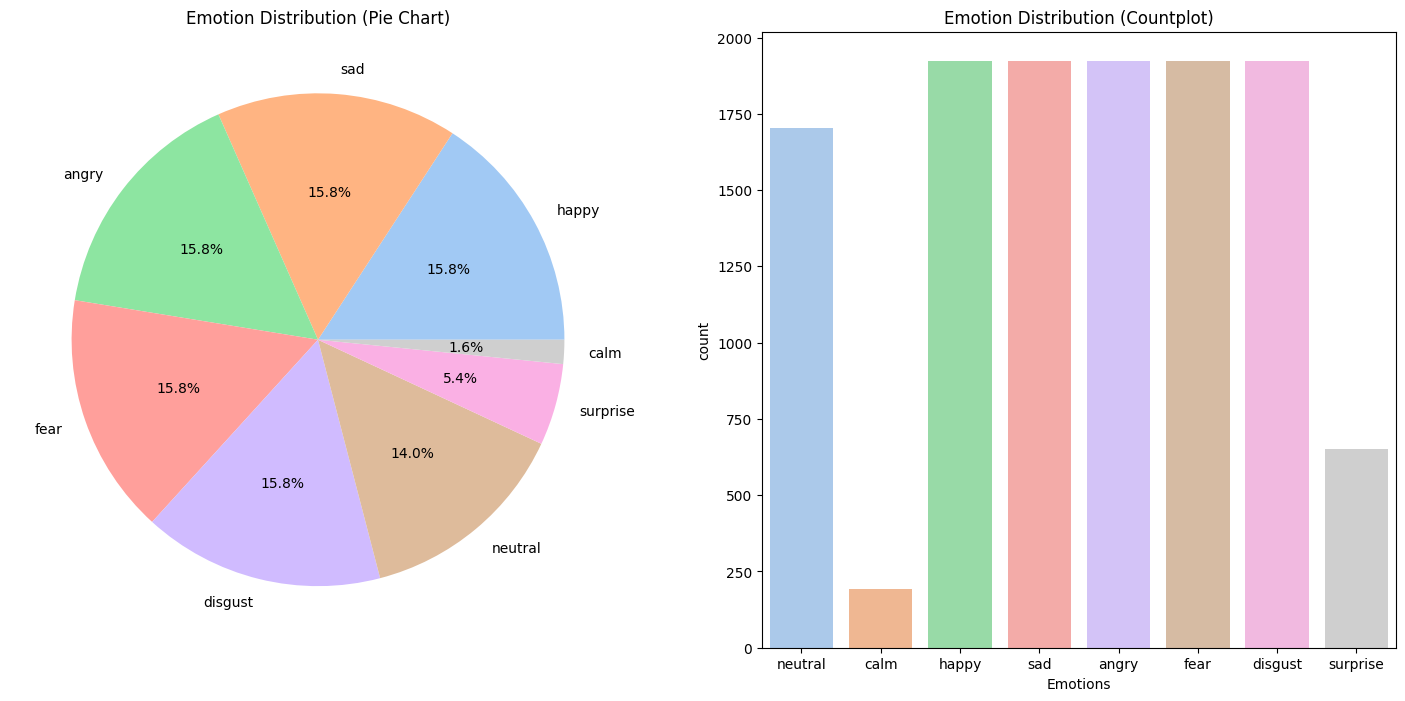

In [15]:
colors = sns.color_palette('pastel')
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
data_path['Emotions'].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%', colors=colors)
ax[0].set_ylabel('')
ax[0].set_title('Emotion Distribution (Pie Chart)')

# Countplot
sns.countplot(data=data_path, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])
ax[1].set_title('Emotion Distribution (Countplot)')

plt.show()

Dari Keempat dataset yang diambil, ketika dikombinasikan terjadi ketidak stabilan, dimana dataset untuk sepech yang terkategori 'surprise' berada di bawah rata - rata dataset lainnya yang mencapai lebih dari 1500 audio file.

##  Visualization

In [23]:
data,sr = librosa.load(file_path[0])
sr

22050

### ZCR

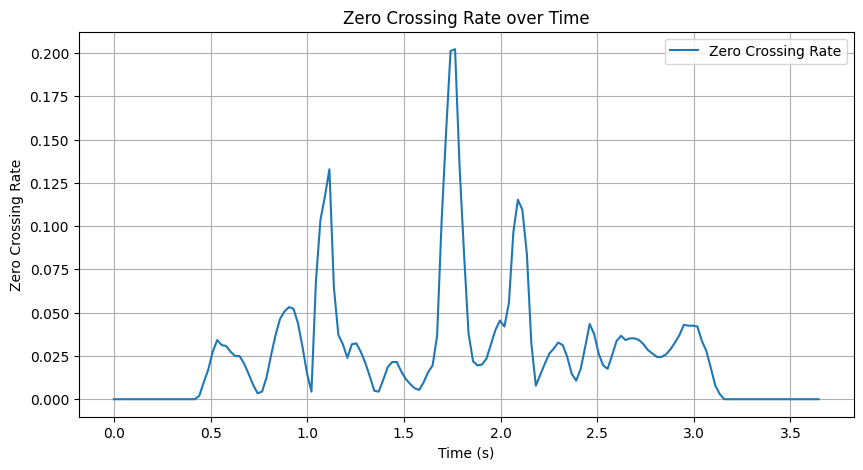

In [27]:
zcr = librosa.feature.zero_crossing_rate(y=data)

# Plot zero crossing rate
plt.figure(figsize=(10, 5))
plt.plot(librosa.times_like(zcr, sr=sr), zcr[0], label='Zero Crossing Rate')
plt.xlabel('Time (s)')
plt.ylabel('Zero Crossing Rate')
plt.title('Zero Crossing Rate over Time')
plt.legend()
plt.grid()
plt.show()

### MFCC

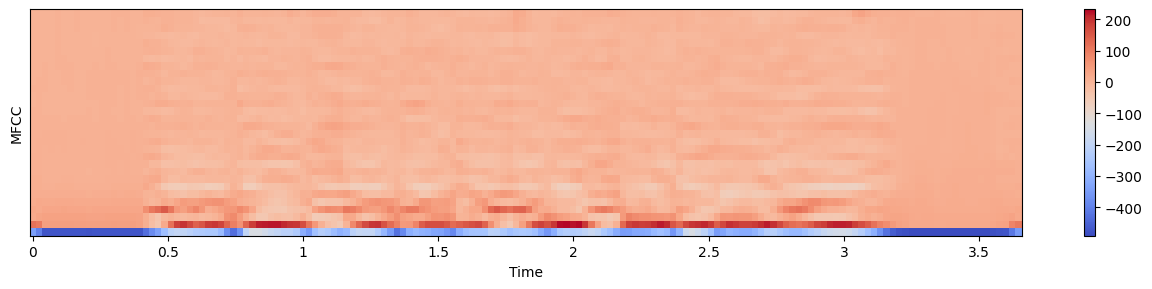

In [28]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

### RMSE

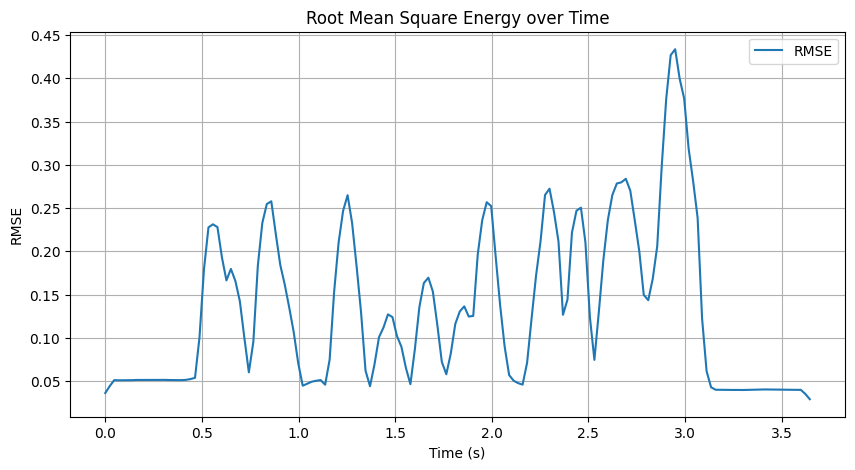

In [29]:
rmse = librosa.feature.rms(y=data)

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.plot(librosa.times_like(rmse, sr=sr), rmse[0], label='RMSE')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('Root Mean Square Energy over Time')
plt.legend()
plt.grid()
plt.show()

In [32]:
def plot_audio_features(data, sr):
    # Calculate RMSE
    rmse = librosa.feature.rms(y=data)
    
    # Calculate MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    
    # Calculate Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y=data)
    
    # Plot all features in a 2x2 figure
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    
    # Plot Waveform
    axes[0, 0].plot(librosa.times_like(data, sr=sr), data)
    axes[0, 0].set_title('Waveform')
    axes[0, 0].set_xlabel('Time (s)')
    axes[0, 0].set_ylabel('Amplitude')
    
    # Plot RMSE
    axes[0, 1].plot(librosa.times_like(rmse, sr=sr), rmse[0])
    axes[0, 1].set_title('RMSE')
    axes[0, 1].set_xlabel('Time (s)')
    axes[0, 1].set_ylabel('RMSE')
    axes[0, 1].grid()
    
    # Plot MFCC
    img = librosa.display.specshow(mfcc, x_axis='time', ax=axes[1, 0])
    fig.colorbar(img, ax=axes[1, 0])
    axes[1, 0].set_title('MFCC')
    axes[1, 0].set_ylabel('MFCC')
    
    # Plot Zero Crossing Rate
    axes[1, 1].plot(librosa.times_like(zcr, sr=sr), zcr[0])
    axes[1, 1].set_title('Zero Crossing Rate')
    axes[1, 1].set_xlabel('Time (s)')
    axes[1, 1].set_ylabel('Zero Crossing Rate')
    axes[1, 1].grid()
    
    plt.tight_layout()
    plt.show()


## Waveform of 7 emotions

### Neutral

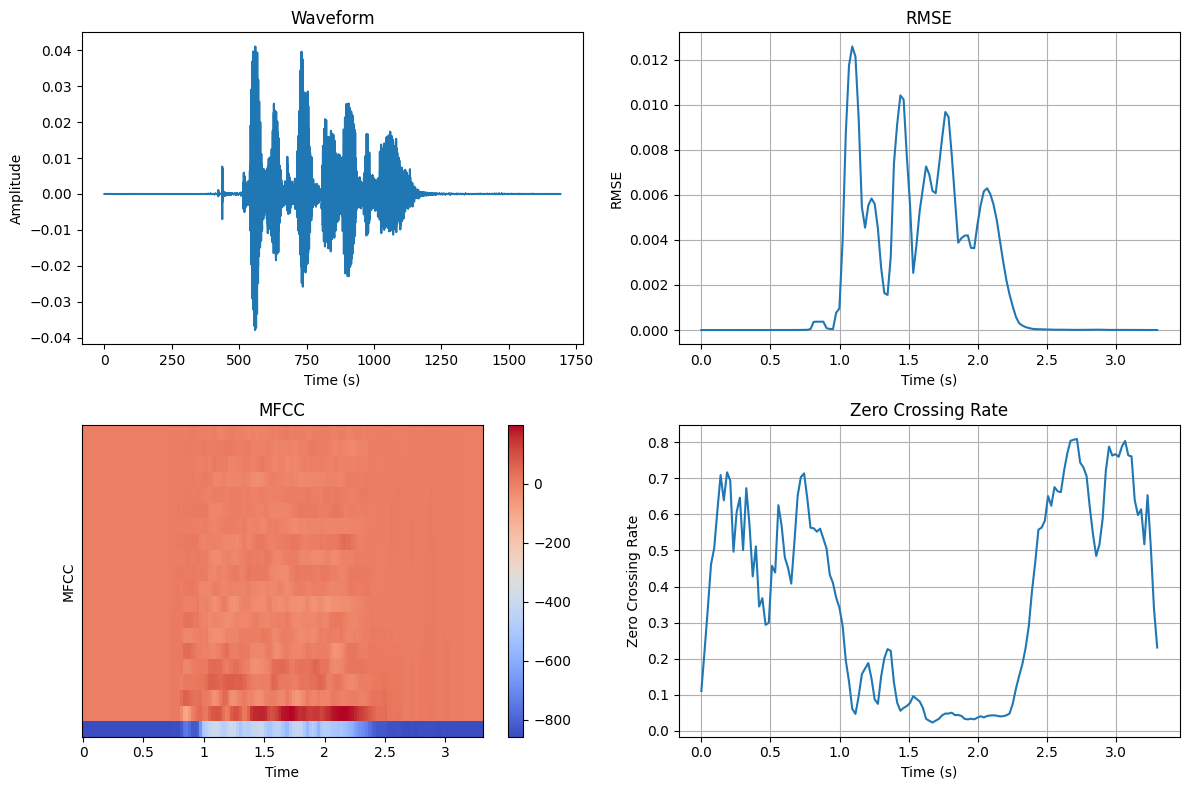

In [33]:
neutral = data_path[data_path['Emotions'] == 'neutral']['Path']
neutral = neutral.iloc[0]
y, sr = librosa.load(neutral)
plot_audio_features(y, sr)

In [34]:
Audio(y, rate = sr)

### Happy

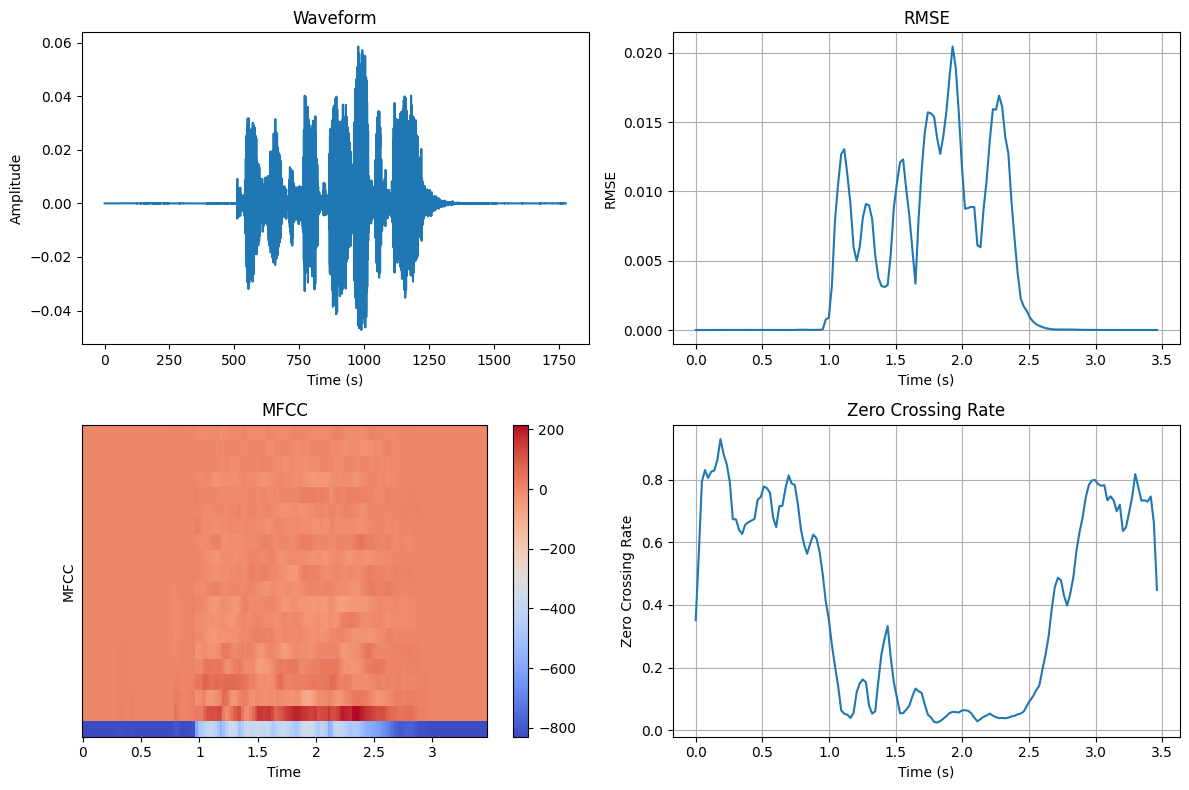

In [38]:
neutral = data_path[data_path['Emotions'] == 'happy']['Path']
neutral = neutral.iloc[0]
y, sr = librosa.load(neutral)
plot_audio_features(y, sr)

In [39]:
Audio(y, rate = sr)

### Sad

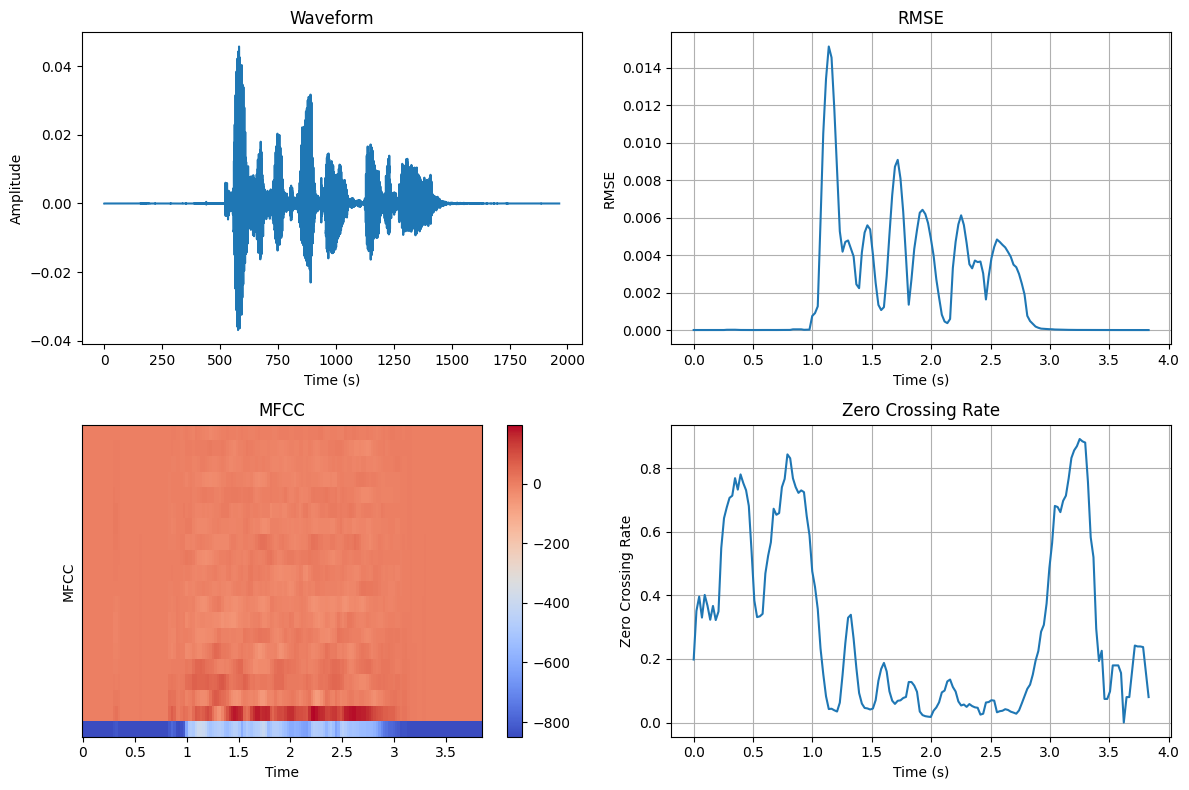

In [40]:
neutral = data_path[data_path['Emotions'] == 'sad']['Path']
neutral = neutral.iloc[0]
y, sr = librosa.load(neutral)
plot_audio_features(y, sr)

In [41]:
Audio(y, rate = sr)

### Angry

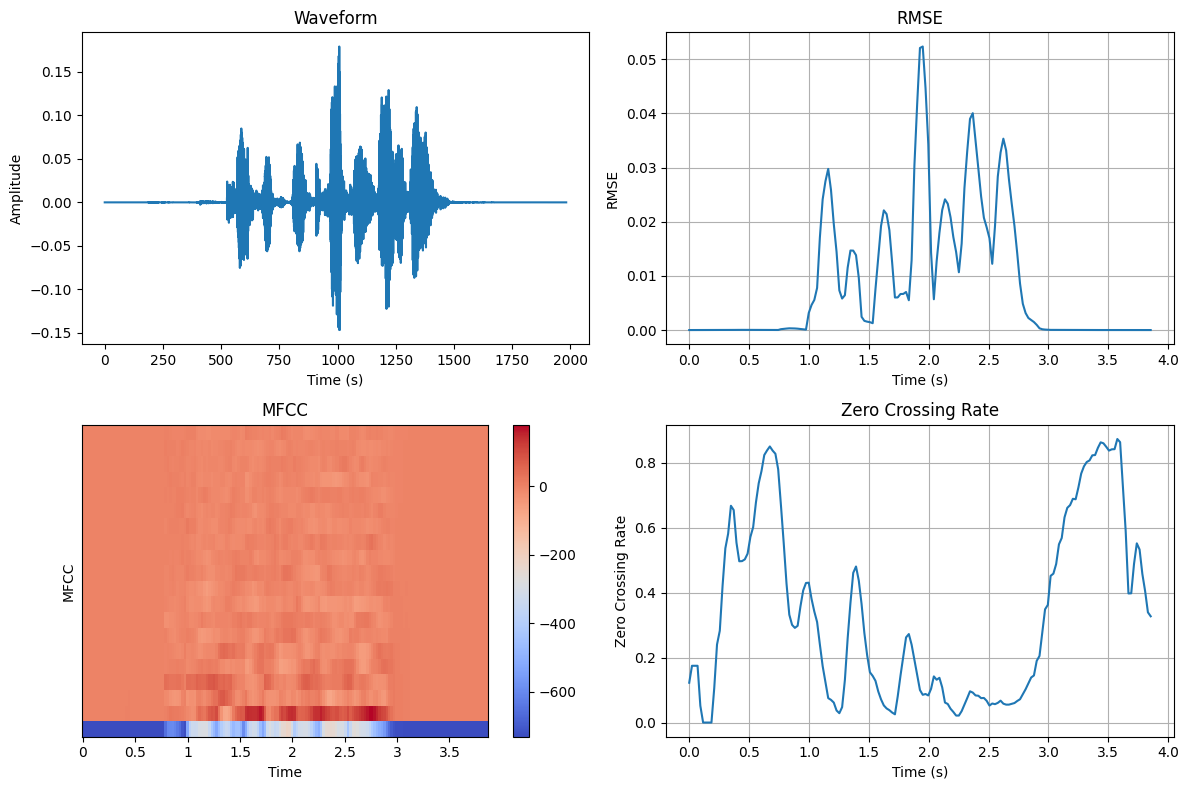

In [42]:
angry = data_path[data_path['Emotions'] == 'angry']['Path']
angry = angry.iloc[0]
y, sr = librosa.load(angry)
plot_audio_features(y, sr)

In [43]:
Audio(y, rate = sr)

### Fear

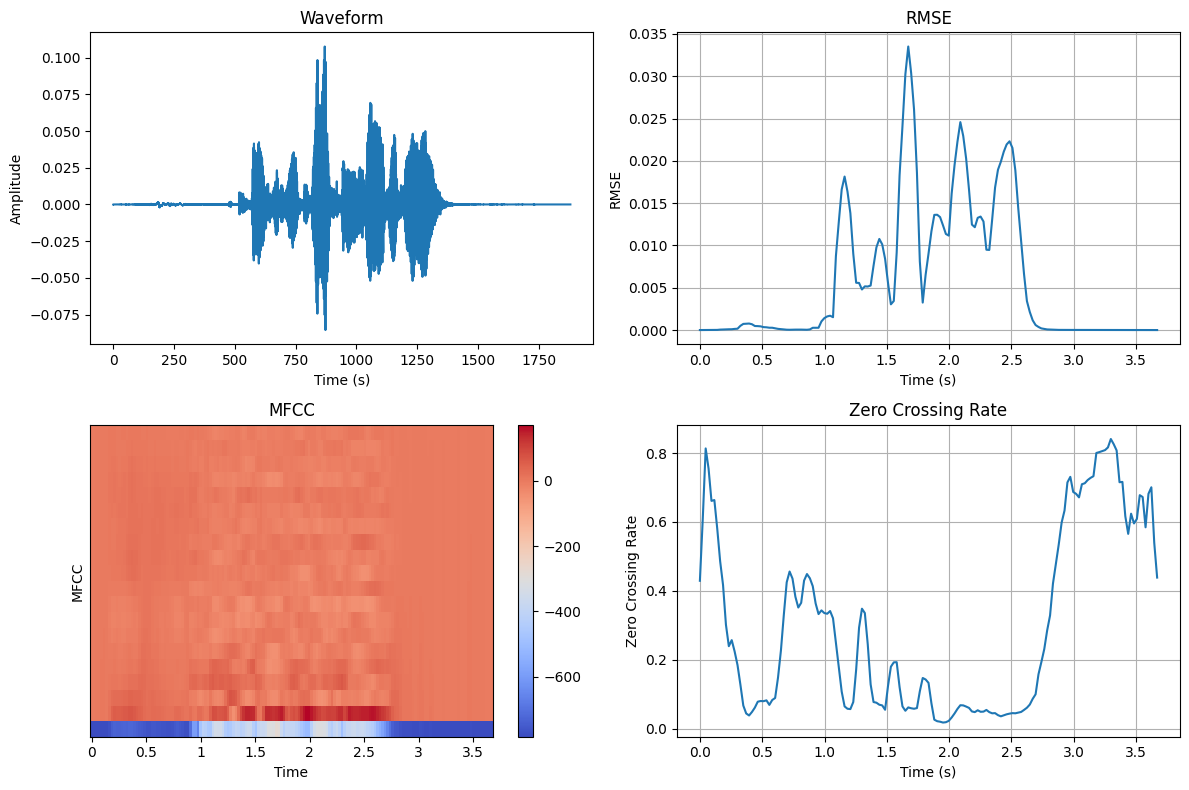

In [44]:
fear = data_path[data_path['Emotions'] == 'fear']['Path']
fear = fear.iloc[0]
y, sr = librosa.load(fear)
plot_audio_features(y, sr)

In [45]:
Audio(y, rate = sr)

### Disgust

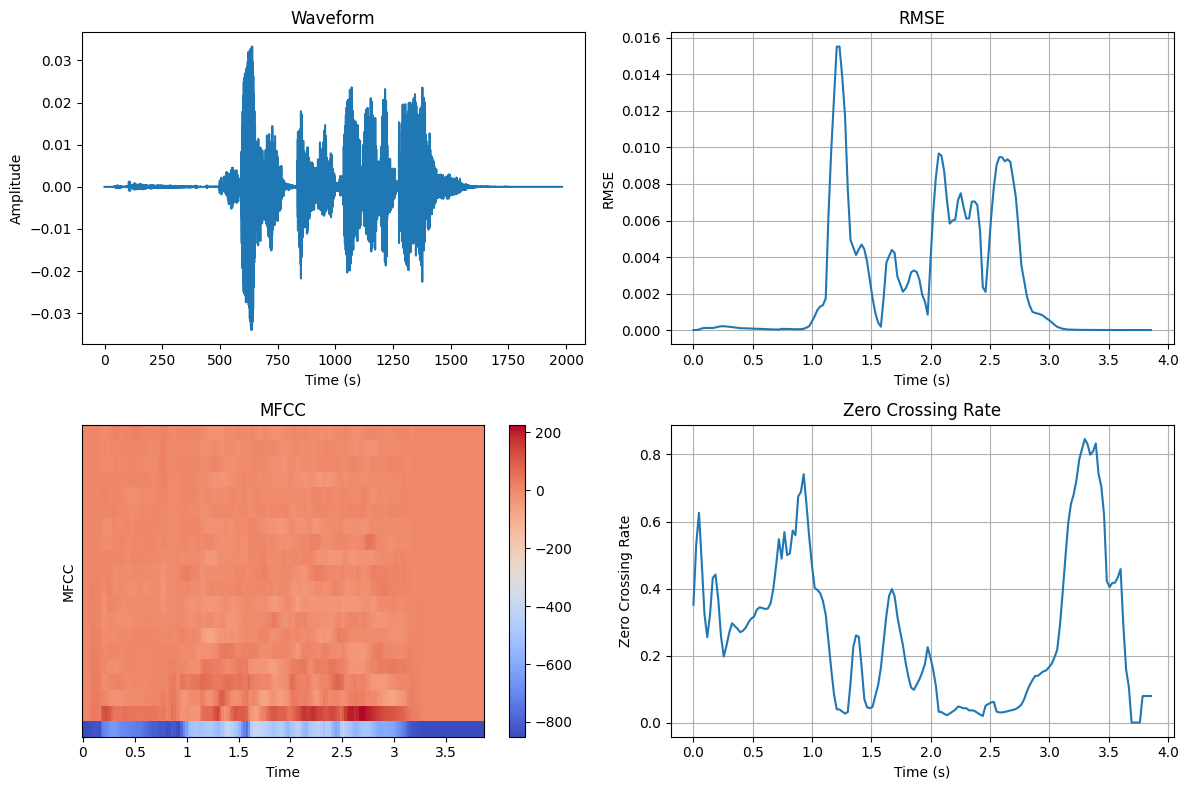

In [46]:
disgust = data_path[data_path['Emotions'] == 'disgust']['Path']
disgust = disgust.iloc[0]
y, sr = librosa.load(disgust)
plot_audio_features(y, sr)

In [47]:
Audio(y, rate = sr)

### Surprise

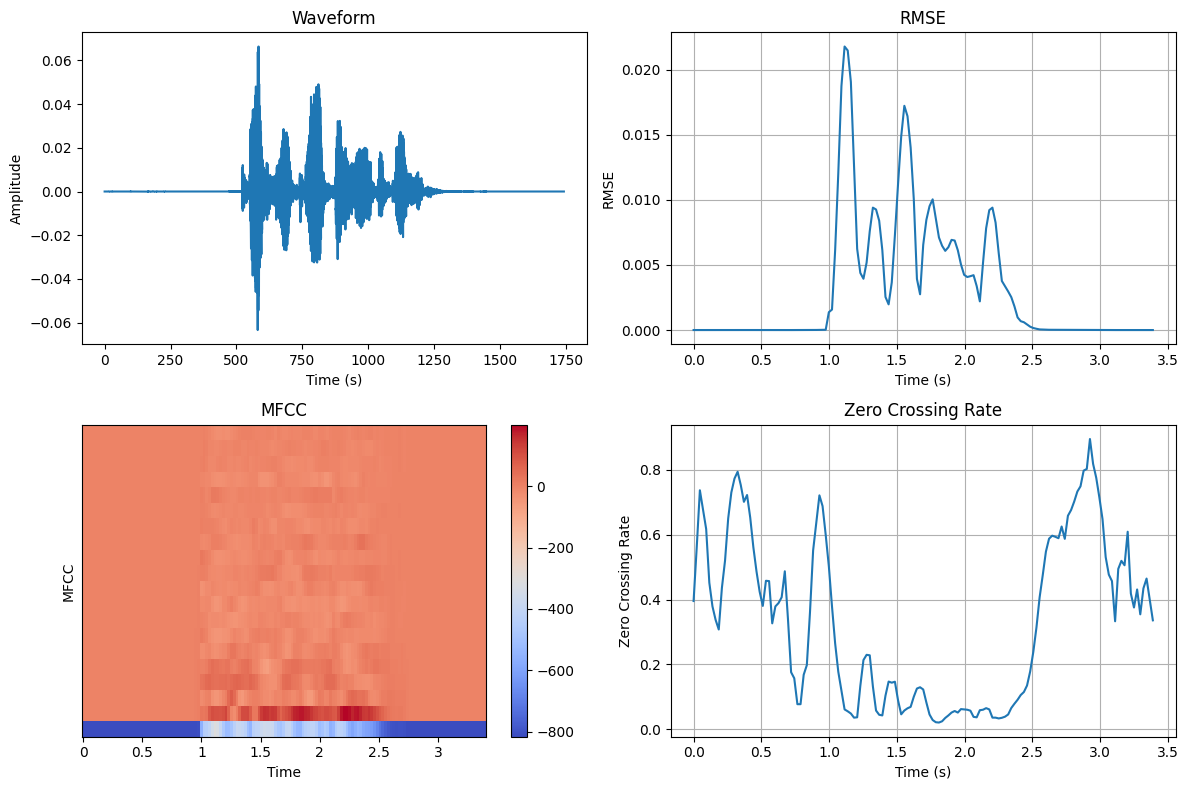

In [48]:
surprise = data_path[data_path['Emotions'] == 'surprise']['Path']
surprise = surprise.iloc[0]
y, sr = librosa.load(surprise)
plot_audio_features(y, sr)

In [49]:
Audio(y, rate = sr)

# Data Preprocessing

## Data Augmentation

### Noise

In [50]:
def noise(data):
    max_amplitude = np.max(np.abs(data))
    amplifier = 0.035 * np.random.uniform() * max_amplitude
    data = data + amplifier*np.random.normal(size = data.shape[0])
    return data

### Stretch

In [51]:
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate = rate)

### Shift

In [52]:
def shift(data):
    shift_range = int(np.random.uniform(low = -5, high=5)*1000)
    return np.roll(data, shift_range)

### Pitch

In [53]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

### Speed Adjustment

In [34]:
def increase_speed(data, speed_factor = 1.25):
    return librosa.effect.time_stretch(data, speed_factor)

def decrease_speed(data, speed_factor = 0.75):
    return librosa.effect.time_stretch(data, speed_factor)

### Random Audio Test

In [62]:
sampel = data_path.sample(n=1)
sampel = sampel['Path'].values[0]
sampel, sr = librosa.load(sampel)
Audio(sampel, rate=sr)

## Data Augmentation Process / Effect

### Normal Audio

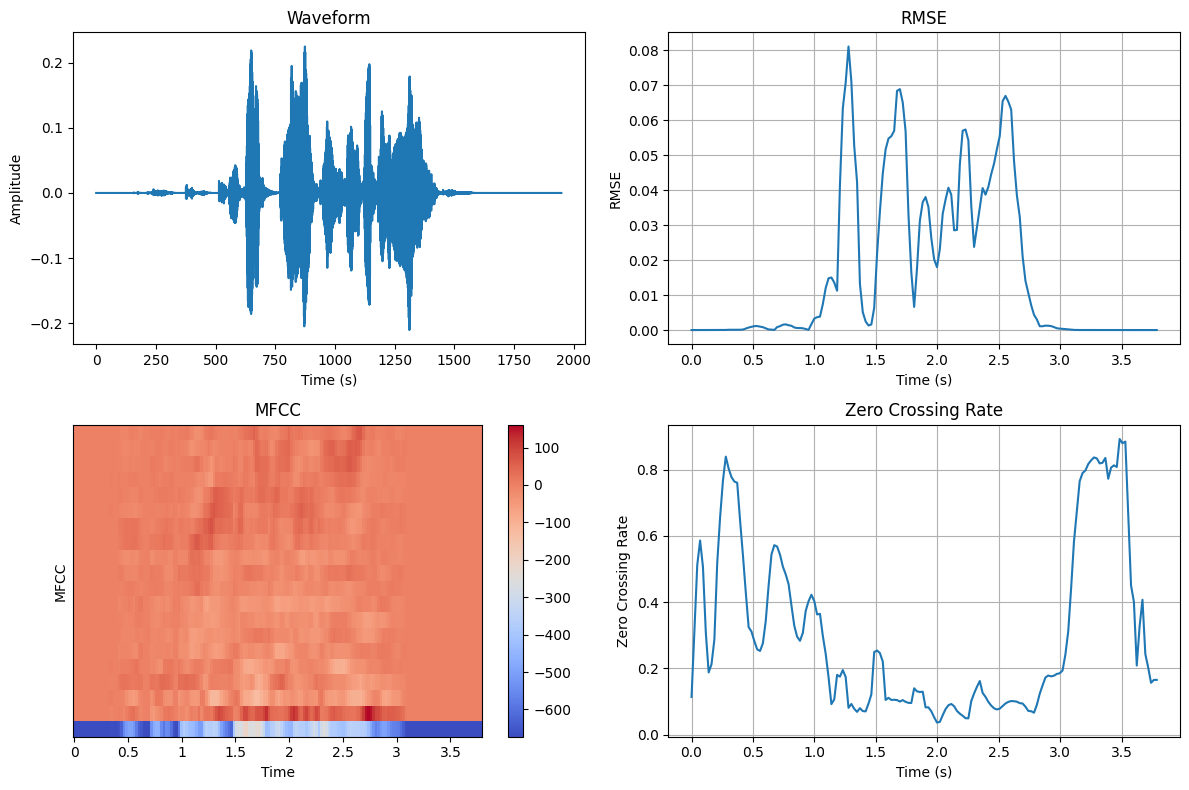

In [63]:
plot_audio_features(sampel, sr)

In [64]:
Audio(sampel, rate=sr)

### Audio with Noise

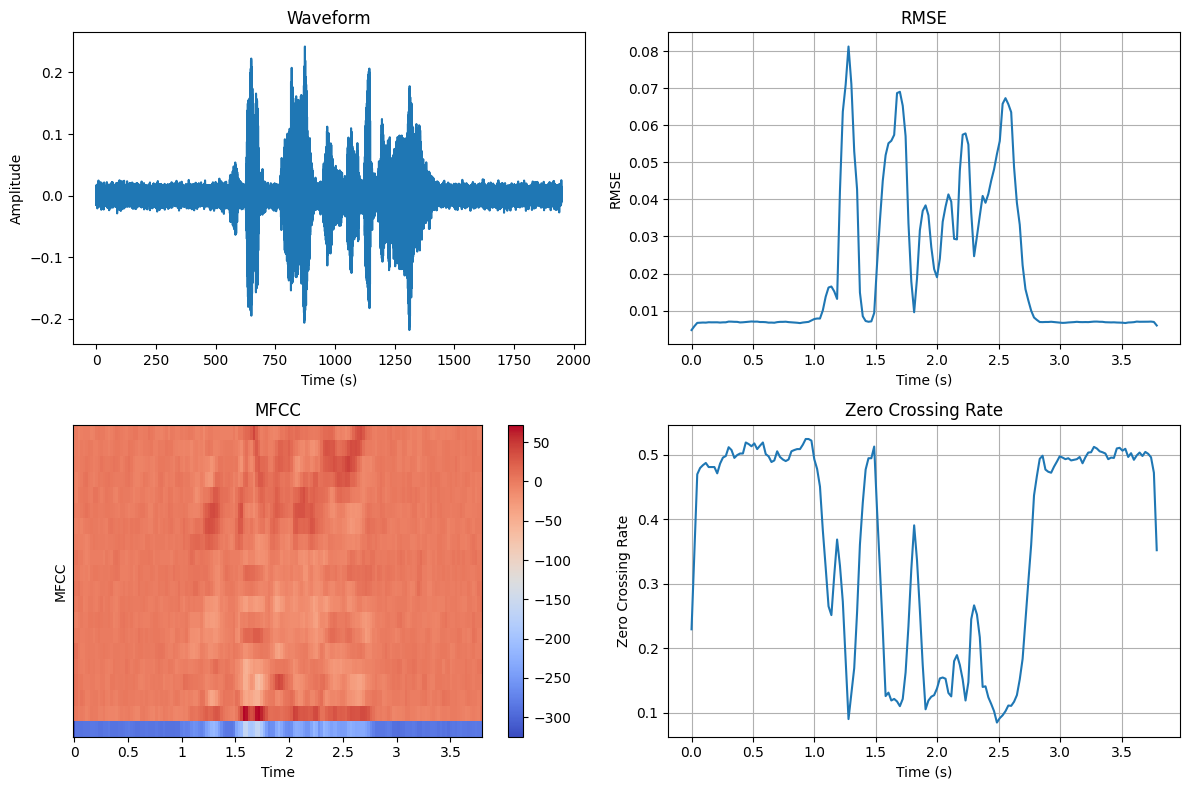

In [65]:
AudioNoise = noise(sampel)
plot_audio_features(AudioNoise, sr)

In [66]:
Audio(AudioNoise, rate=sr)

### Stretched Audio

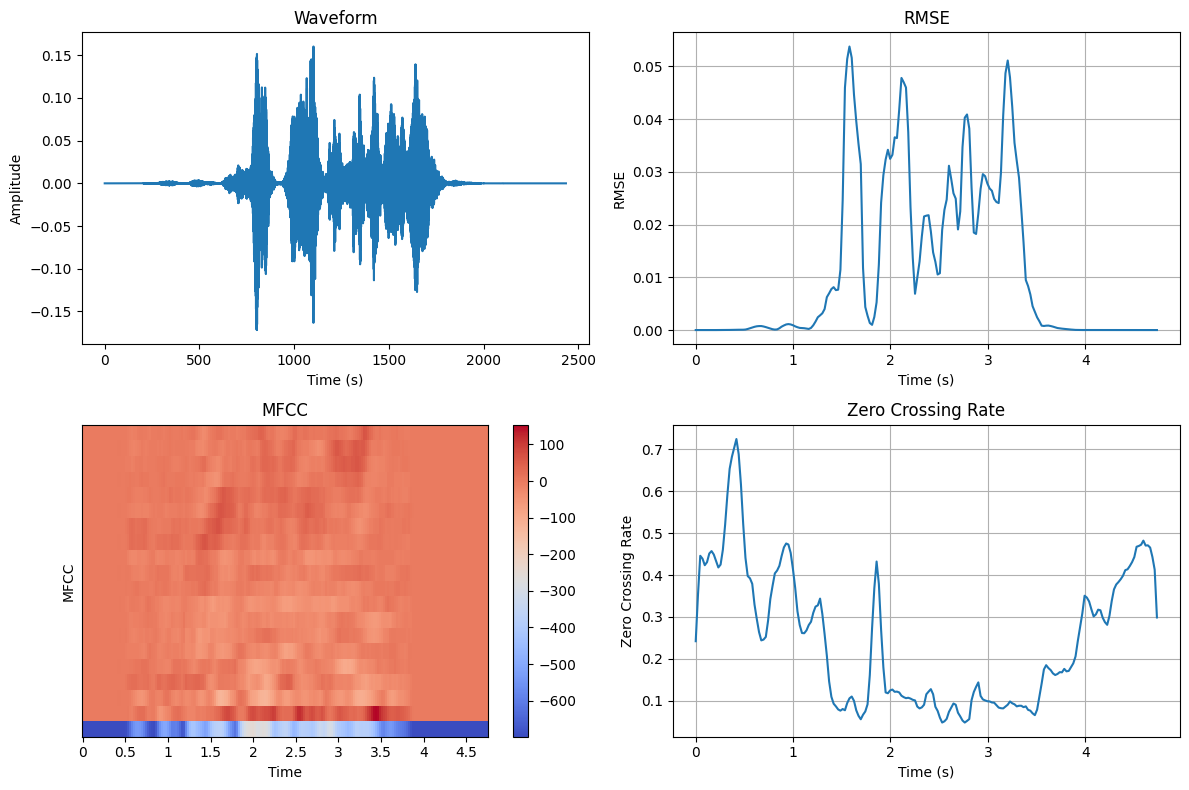

In [67]:
StretchedNoise = stretch(sampel)
plot_audio_features(StretchedNoise, sr)

In [41]:
Audio(StretchedNoise, rate=sr)

### Shifted Audio

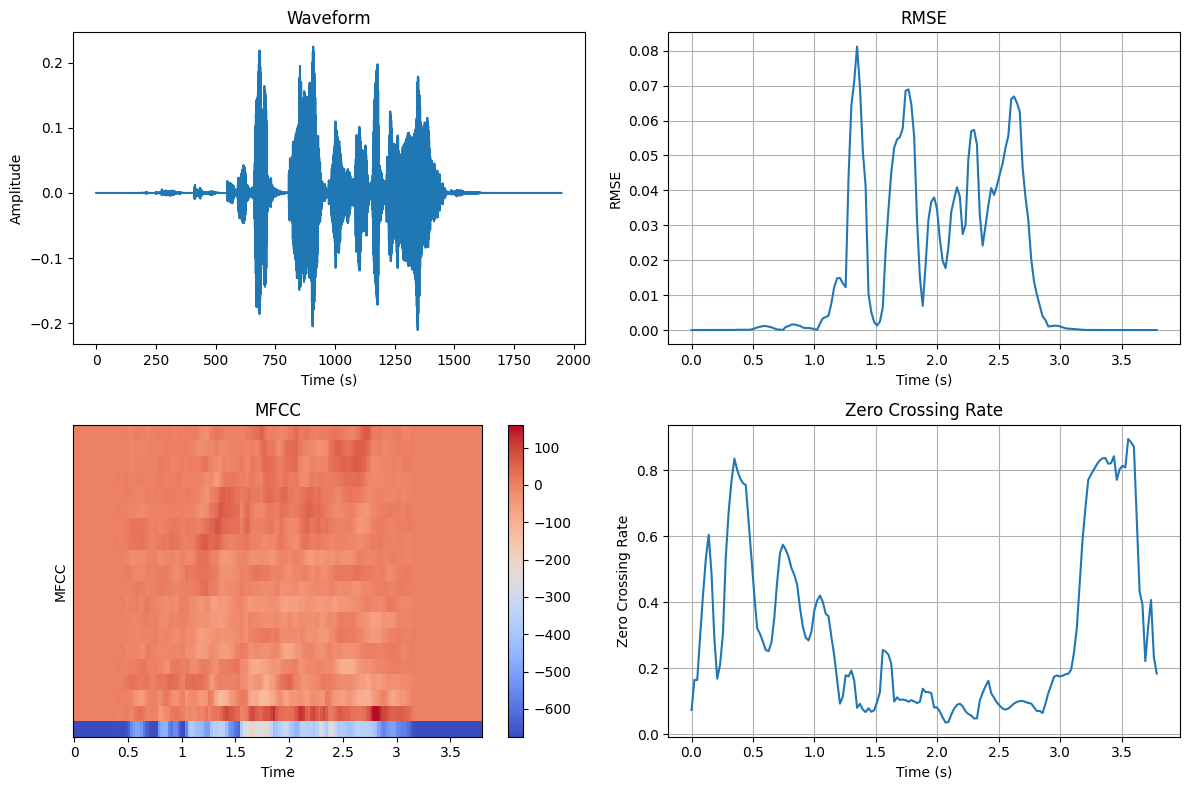

In [68]:
ShiftedNoise = shift(sampel)
plot_audio_features(ShiftedNoise, sr)

In [43]:
Audio(ShiftedNoise, rate=sr)

### Pitched Audio

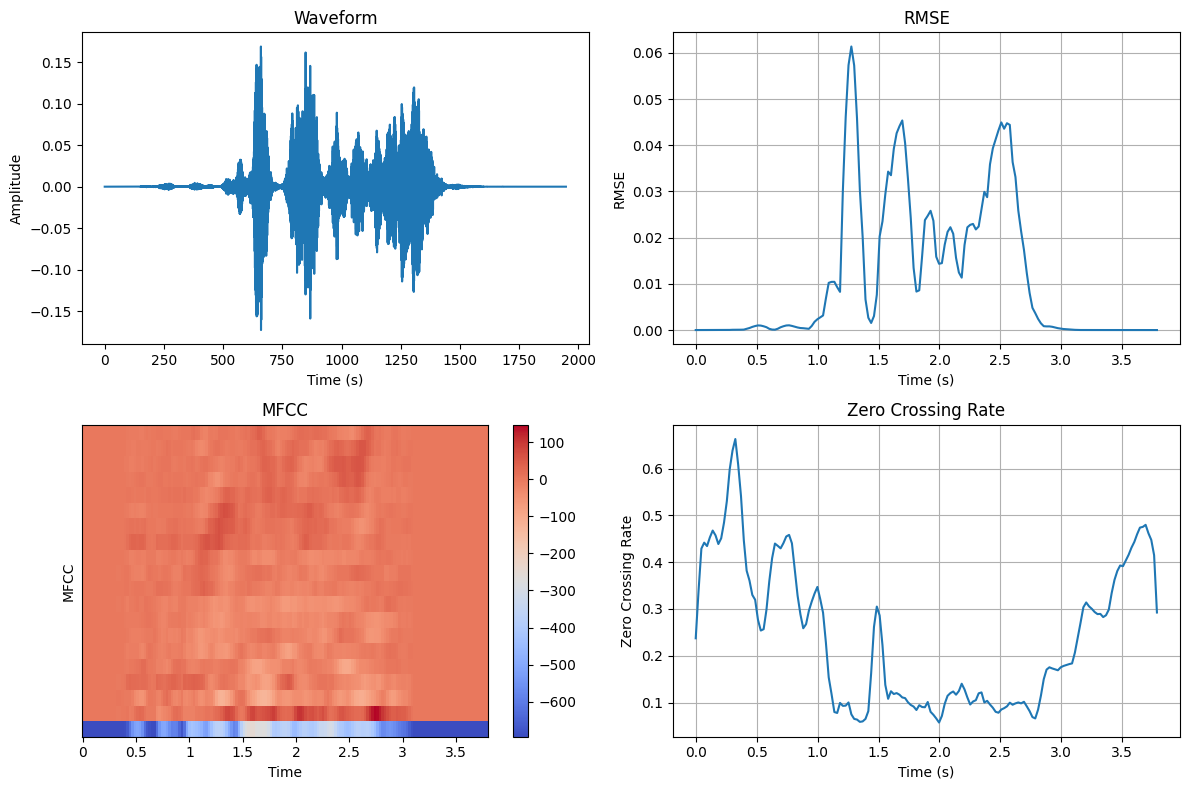

In [69]:
PitchedNoise = pitch(sampel, sr)  # Assuming `sample` and `sr` are defined elsewhere
plot_audio_features(PitchedNoise, sr)


In [70]:
Audio(PitchedNoise, rate=sr)

# Feature Extraction

### MFCC

In [46]:
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)


### ZCR (Zero Crossing Rate)

In [47]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

### RMSE

In [48]:
def rmse(data, frame_length=2048, hop_length=512):
    rmse_result = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_result)


## Extract Feature

In [49]:
def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

## Get Features

In [50]:
def get_features(path,duration=2.5, offset=0.6):
    # Normal Audio
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    result=np.array(aud)
    
    #Noised
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    result=np.vstack((result, aud2))
    
    #Pitched
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    result=np.vstack((result, aud3))
    
    #Shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))


    return result

## Import Features

In [51]:
import os
import pandas as pd
from tqdm import tqdm
import timeit

def process_audio_data(data_path):
    csv_file_path = 'withcalm.csv'

    if os.path.exists(csv_file_path):
        Emotions = pd.read_csv(csv_file_path)
        print("File loaded successfully.")
    else:
        X, Y = [], []
        for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):
            features = get_features(path)
            if index % 500 == 0:
                print(f'{index} audio files have been processed')
            for i in features:
                X.append(i)
                Y.append(emotion)
        print('Done processing all audio files.')

        Emotions = pd.DataFrame(X)
        Emotions['Emotions'] = Y
        Emotions.to_csv(csv_file_path, index=False)
        print("File saved successfully.")

    return Emotions

In [52]:
start = timeit.default_timer()
processed_data = process_audio_data(data_path)
stop = timeit.default_timer()
print('Time: ', stop - start)

processed_data.head()

File loaded successfully.
Time:  15.896281199995428


0         1         2         3         4         5         6  \
0  0.173828  0.264648  0.372559  0.486328  0.625488  0.681152  0.720703   
1  0.239746  0.364746  0.496582  0.507324  0.499023  0.493164  0.486328   
2  0.256348  0.354492  0.471191  0.414062  0.378418  0.373535  0.354492   
3  0.402832  0.591797  0.787598  0.762695  0.755859  0.789062  0.802734   
4  0.247070  0.389648  0.564941  0.642578  0.665527  0.684570  0.676270   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.651855  0.562988  0.559082  ...  0.766315  0.755441  0.743671  0.731043   
1  0.488281  0.505371  0.518066  ...  0.466811 -3.218127 -3.953877 -3.455453   
2  0.408691  0.466797  0.522461  ...  0.006713  0.006601  0.006483  0.006356   
3  0.750977  0.608887  0.520996  ...  6.568960  6.261176  5.893408  5.442966   
4  0.666992  0.648926  0.595703  ...  0.000000  0.000000  0.000000  0.000000   

       2371      2372      2373      2374      2375  Emotions  
0  0.717561  0.703260  0.688124  0.672208  0.655518   neutral  
1 -1.247394  0.733830 -3.870181 -5.334859 -0.614282   neutral  
2  0.006218  0.006066  0.005919  0.005759  0.005588   neutral  
3  4.903555  4.287675  3.625326  2.959182  2.337327   neutral  
4  0.000000  0.000000  0.000000  0.000000  0.000000   neutral  

[5 rows x 2377 columns]

### Checking Data

In [53]:
Emotions = processed_data
Emotions=Emotions.fillna(0)
np.sum(Emotions.isna())

c:\Users\user\miniconda3\envs\tensorflowgpu\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_34600\515364475.py:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.countplot(data=data, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])


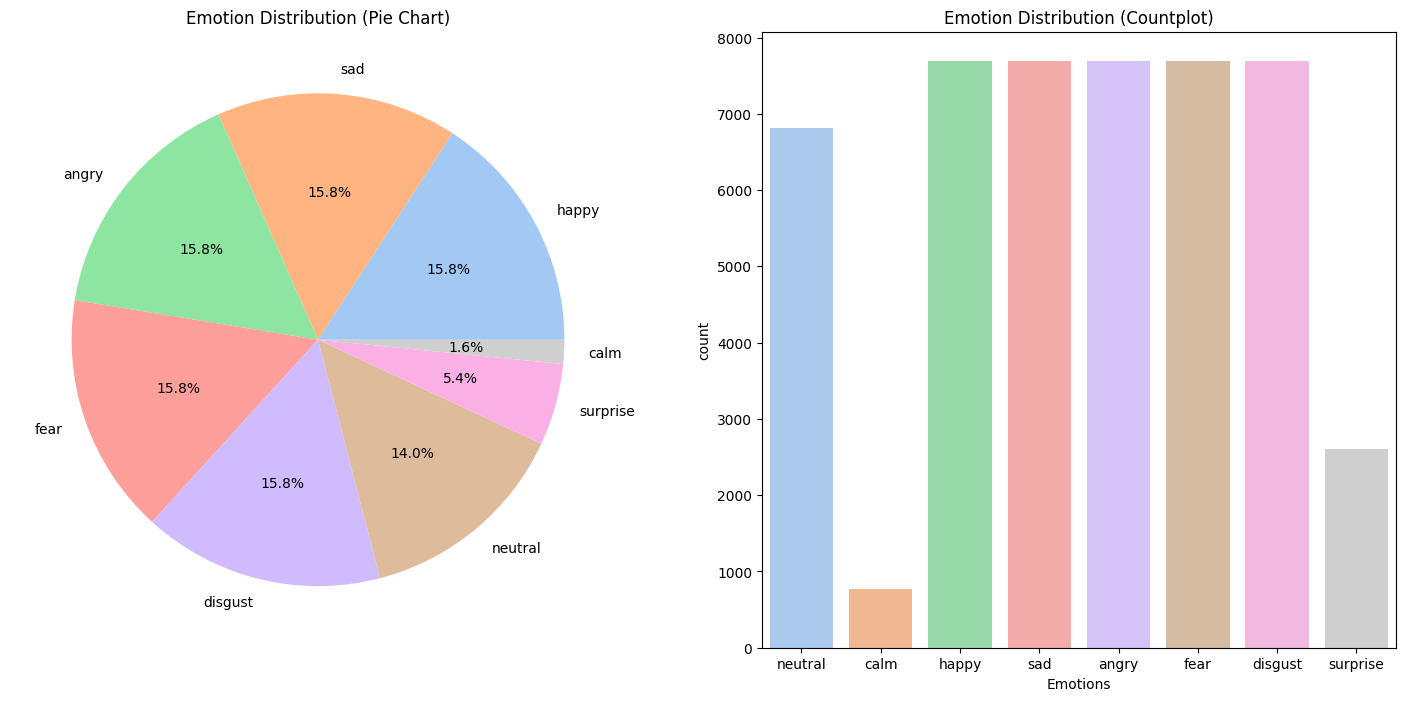

In [54]:
data = pd.read_csv('withcalm.csv')
colors = sns.color_palette('pastel')
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
# Pie chart
data['Emotions'].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%', colors=colors)
ax[0].set_ylabel('')
ax[0].set_title('Emotion Distribution (Pie Chart)')

# Countplot
sns.countplot(data=data, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])
ax[1].set_title('Emotion Distribution (Countplot)')

plt.show()

# Preparation for Modeling

### Splitting Features and Target

In [55]:
X = Emotions.iloc[:, :-1].values
y = Emotions.iloc[:, -1].values

### Encode Class

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Spitting Train and Test Set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
print(X_train.shape) 
print(y_train.shape)

(38918, 2376)
(38918, 8)


# Modeling

## CNN

### Model

In [62]:
import tensorflow as tf, pickle, matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense, ReLU

In [ ]:
import matplotlib.pyplot as plt

def train_or_load_model(model_file, x_train, y_train, x_test, y_test):
    if os.path.exists(model_file):
        model = tf.keras.models.load_model(model_file)
        print("Model loaded successfully.")
    else:
        model_checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', save_best_only=True)
        early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

        x_traincnn = np.expand_dims(x_train, axis=2)
        x_testcnn = np.expand_dims(x_test, axis=2)

        model = Sequential()
        model.add(Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(x_train.shape[1], 1)))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding="same"))

        #Hidden layer
        model.add(Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding="same"))
     

        model.add(Conv1D(128, kernel_size=5, strides=1, padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding="same"))
    

        model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))


        model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=3, strides=2, padding='same'))


        model.add(Flatten())
        
        #Fully Connected - Layer
        model.add(Dense(256, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(8, activation="softmax"))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,
                            callbacks=[early_stop, lr_reduction, model_checkpoint])

        # Plotting
        epoch = [i for i in range(len(history.history['accuracy']))]
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20, 6)

        ax[0].plot(epoch, history.history['loss'], label='Training Loss')
        ax[0].plot(epoch, history.history['val_loss'], label='Testing Loss')
        ax[0].set_title('Training & Testing Loss')
        ax[0].legend()
        ax[0].set_xlabel('Epochs')

        ax[1].plot(epoch, history.history['accuracy'], label='Training Accuracy')
        ax[1].plot(epoch, history.history['val_accuracy'], label='Testing Accuracy')
        ax[1].set_title('Training & Testing Accuracy')
        ax[1].legend()
        ax[1].set_xlabel('Epochs')

        plt.show()

    print('CNN Accuracy Model: ', model.evaluate(x_testcnn, y_test)[1])

    return model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 2376, 256)         1536      
                                                                 
 batch_normalization_49 (Bat  (None, 2376, 256)        1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 1188, 256)        0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 1188, 256)         327936    
                                                                 
 batch_normalization_50 (Bat  (None, 1188, 256)        1024      
 chNormalization)                                                
                                                      

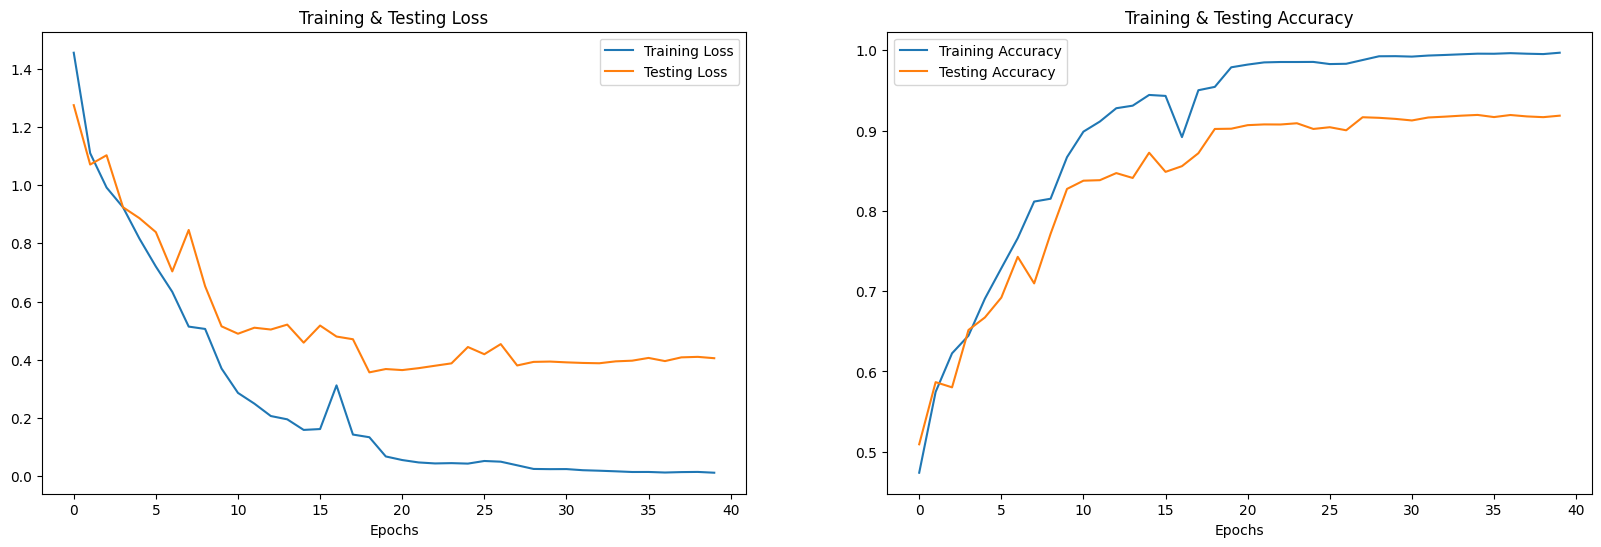

305/305 [==============================] - 5s 15ms/step - loss: 0.3968 - accuracy: 0.9195
CNN Accuracy Model:  0.9195272326469421


In [ ]:
model_file = 'cnnmodel.h5'
trained_model = train_or_load_model(model_file, X_train, y_train, X_test, y_test)

### Test Prediction

In [ ]:
pred = trained_model.predict(X_test)
pred = encoder.inverse_transform(pred)
test = encoder.inverse_transform(y_test)

TestData = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
TestData['Predicted Labels'] = pred.flatten()
TestData['Actual Labels'] = test.flatten()

TestData.head(20)

305/305 [==============================] - 5s 15ms/step


Predicted Labels Actual Labels
0               sad           sad
1             happy         happy
2              fear          fear
3             angry         angry
4             angry         angry
5              fear          fear
6           disgust       disgust
7           neutral       neutral
8          surprise      surprise
9           neutral           sad
10          neutral       neutral
11            angry         angry
12            angry         angry
13          disgust       disgust
14          neutral          fear
15            angry         angry
16            angry         angry
17          neutral       neutral
18            angry         angry
19          disgust       disgust

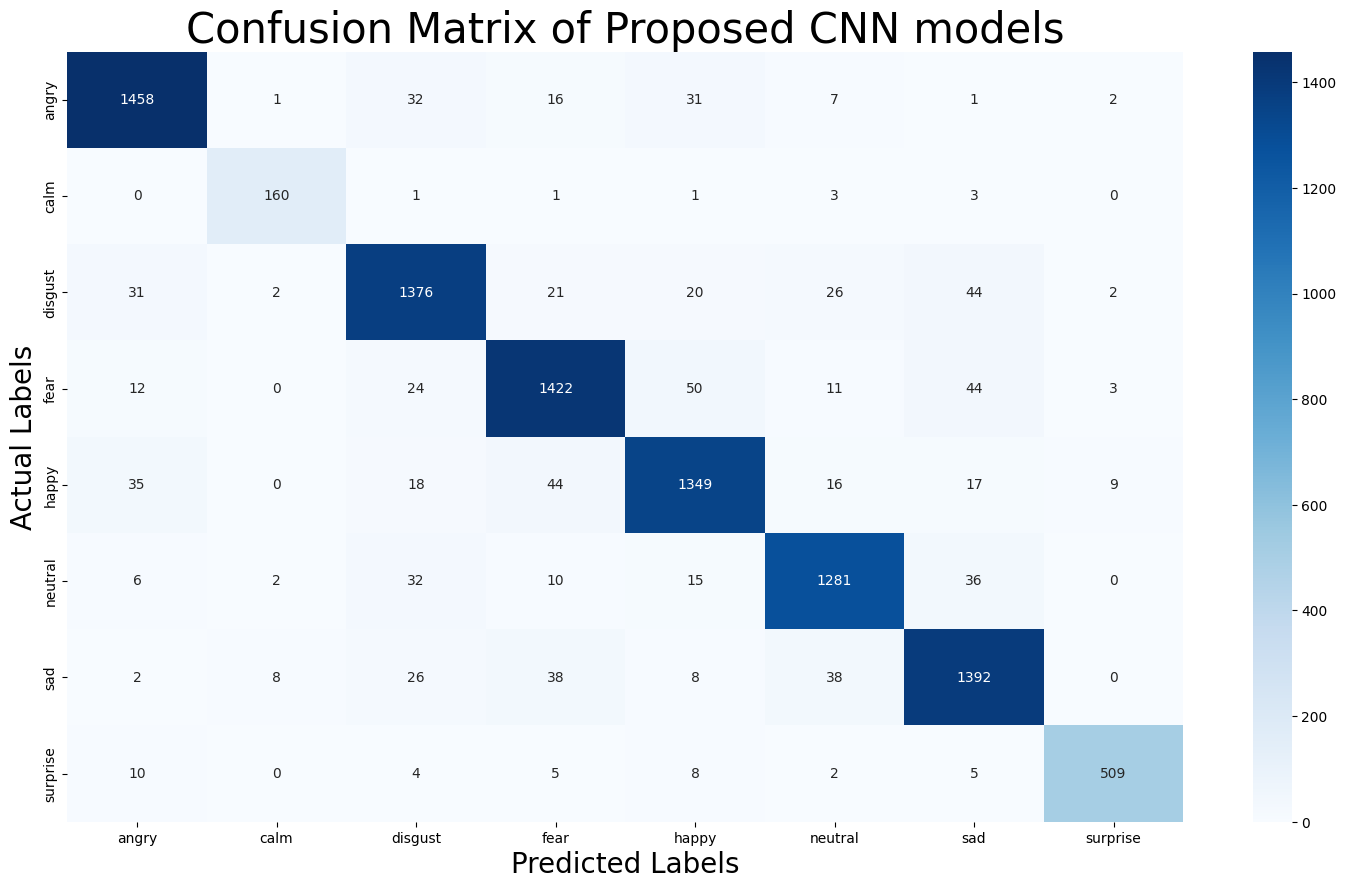

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(test, pred)
plt.figure(figsize = (18, 10))
cm = pd.DataFrame(cm, index = [i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, cmap='Blues', annot = True, fmt = '.0f', linecolor='white')
plt.title('Confusion Matrix of Proposed CNN models', size = 30)
plt.xlabel('Predicted Labels', size = 20)
plt.ylabel('Actual Labels', size = 20)
plt.show()

In [ ]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

       angry       0.94      0.94      0.94      1548
        calm       0.92      0.95      0.94       169
     disgust       0.91      0.90      0.91      1522
        fear       0.91      0.91      0.91      1566
       happy       0.91      0.91      0.91      1488
     neutral       0.93      0.93      0.93      1382
         sad       0.90      0.92      0.91      1512
    surprise       0.97      0.94      0.95       543

    accuracy                           0.92      9730
   macro avg       0.92      0.92      0.92      9730
weighted avg       0.92      0.92      0.92      9730



## LSTM

### Model

In [ ]:
def train_lstm(model_file, x_train, y_train, x_test, y_test):
    if os.path.exists(model_file):
        model = tf.keras.models.load_model(model_file)
        print("Model loaded successfully.")
    else:
        model_checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', save_best_only=True)
        early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

        x_traincnn = np.expand_dims(x_train, axis=2)
        x_testcnn = np.expand_dims(x_test, axis=2)

        model = Sequential()
        model.add(BatchNormalization(input_shape=(x_train.shape[1], 1)))
        # LSTM stack with 256 units
        model.add(LSTM(units=128, return_sequences=True))
        model.add(LSTM(units=128, return_sequences=True))
        model.add(LSTM(units=128, return_sequences=True))

        
        model.add(Flatten())
        model.add(Dropout(0.3))
        model.add(Dense(8, activation="softmax"))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,
                            callbacks=[early_stop, lr_reduction, model_checkpoint])

        # Plotting
        epoch = [i for i in range(len(history.history['accuracy']))]
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20, 6)

        ax[0].plot(epoch, history.history['loss'], label='Training Loss')
        ax[0].plot(epoch, history.history['val_loss'], label='Testing Loss')
        ax[0].set_title('Training & Testing Loss')
        ax[0].legend()
        ax[0].set_xlabel('Epochs')

        ax[1].plot(epoch, history.history['accuracy'], label='Training Accuracy')
        ax[1].plot(epoch, history.history['val_accuracy'], label='Testing Accuracy')
        ax[1].set_title('Training & Testing Accuracy')
        ax[1].legend()
        ax[1].set_xlabel('Epochs')

        plt.show()

    print('LSTM Accuracy Model: ', model.evaluate(x_testcnn, y_test)[1])

    return model

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_57 (Bat  (None, 2376, 1)          4         
 chNormalization)                                                
                                                                 
 lstm_36 (LSTM)              (None, 2376, 128)         66560     
                                                                 
 lstm_37 (LSTM)              (None, 2376, 128)         131584    
                                                                 
 lstm_38 (LSTM)              (None, 2376, 128)         131584    
                                                                 
 flatten_16 (Flatten)        (None, 304128)            0         
                                                                 
 dropout_33 (Dropout)        (None, 304128)            0         
                                                     

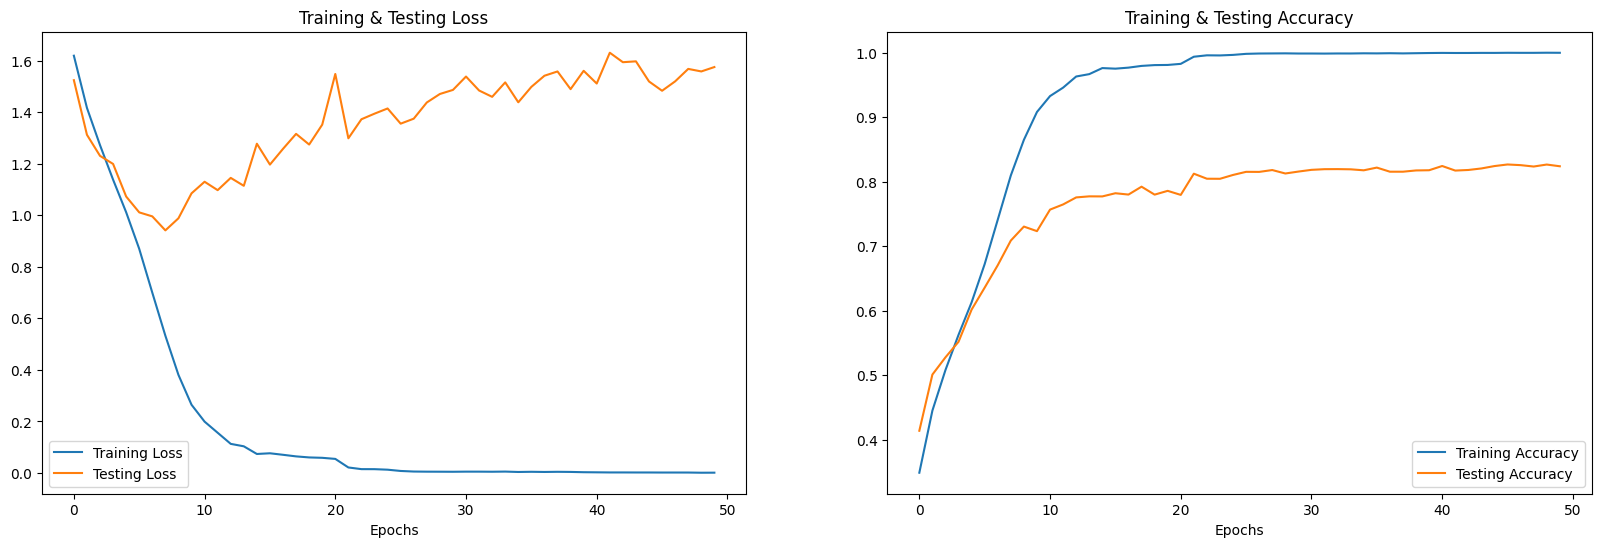

305/305 [==============================] - 82s 268ms/step - loss: 1.5748 - accuracy: 0.8237
LSTM Accuracy Model:  0.8237410187721252


In [ ]:
model_file = 'lstmmodel.h5'
lstm = train_lstm(model_file, X_train, y_train, X_test, y_test)

### Test Prediction

In [ ]:
pred = lstm.predict(X_test)
pred = encoder.inverse_transform(pred)
test = encoder.inverse_transform(y_test)

TestData = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
TestData['Predicted Labels'] = pred.flatten()
TestData['Actual Labels'] = test.flatten()

TestData.head(20)

305/305 [==============================] - 81s 262ms/step


Predicted Labels Actual Labels
0               sad           sad
1             happy         happy
2              fear          fear
3             angry         angry
4             angry         angry
5              fear          fear
6           disgust       disgust
7           neutral       neutral
8          surprise      surprise
9           disgust           sad
10          neutral       neutral
11            angry         angry
12          disgust         angry
13          disgust       disgust
14              sad          fear
15            angry         angry
16            angry         angry
17              sad       neutral
18            angry         angry
19          neutral       disgust

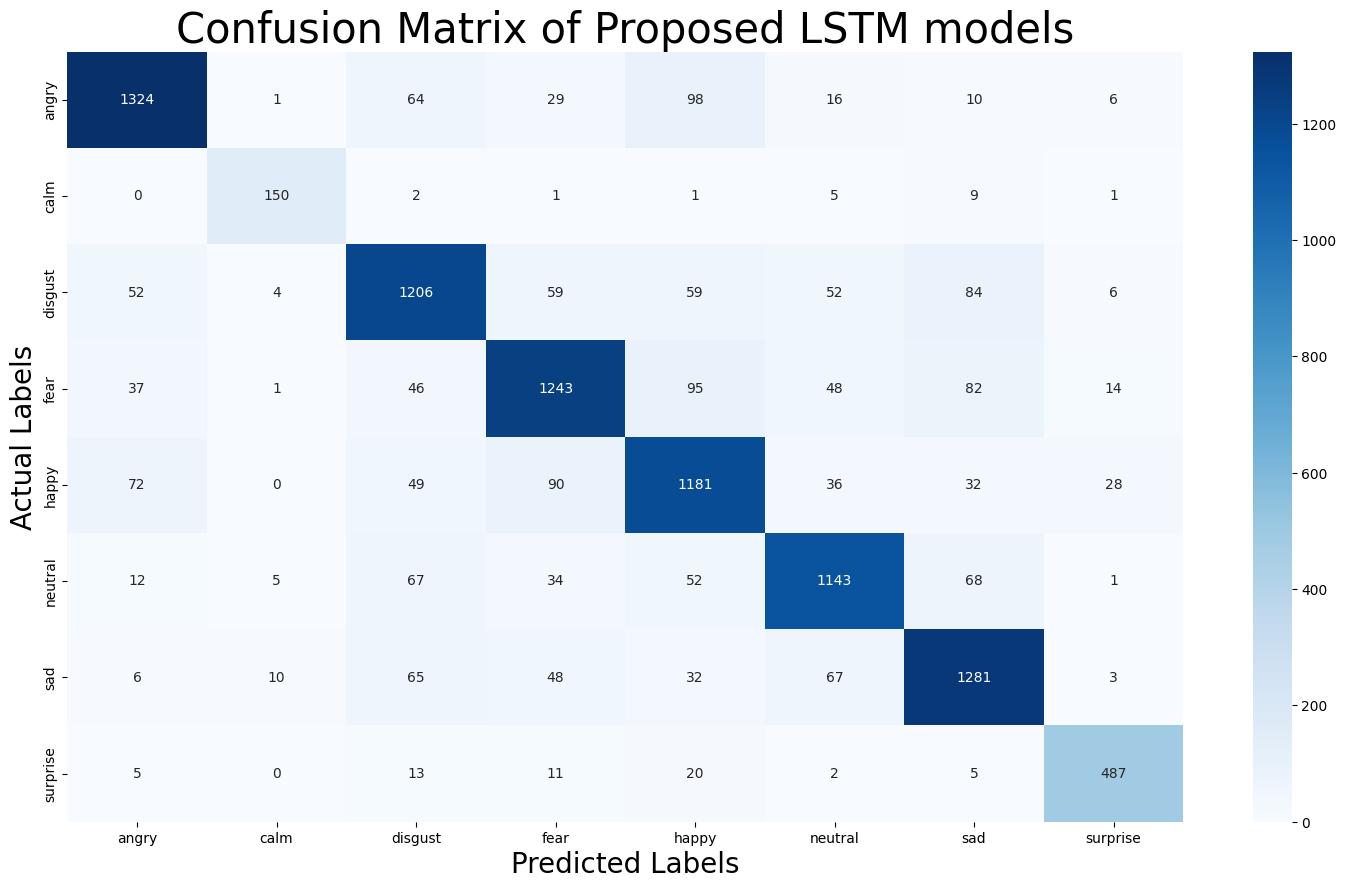

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(test, pred)
plt.figure(figsize = (18, 10))
cm = pd.DataFrame(cm, index = [i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, cmap='Blues', annot = True, fmt = '.0f', linecolor='white')
plt.title('Confusion Matrix of Proposed LSTM models', size = 30)
plt.xlabel('Predicted Labels', size = 20)
plt.ylabel('Actual Labels', size = 20)
plt.show()

In [ ]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

       angry       0.88      0.86      0.87      1548
        calm       0.88      0.89      0.88       169
     disgust       0.80      0.79      0.79      1522
        fear       0.82      0.79      0.81      1566
       happy       0.77      0.79      0.78      1488
     neutral       0.83      0.83      0.83      1382
         sad       0.82      0.85      0.83      1512
    surprise       0.89      0.90      0.89       543

    accuracy                           0.82      9730
   macro avg       0.84      0.84      0.84      9730
weighted avg       0.82      0.82      0.82      9730



## CNN - LSTM

### Model

In [ ]:
def train_cnnlstm(model_file, x_train, y_train, x_test, y_test):
    if os.path.exists(model_file):
        model = tf.keras.models.load_model(model_file)
        print("Model loaded successfully.")
        return model
    else:
        model_checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', save_best_only=True)
        early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

        x_traincnn = np.expand_dims(x_train, axis=2)
        x_testcnn = np.expand_dims(x_test, axis=2)

        model = Sequential()
        model.add(Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(x_train.shape[1], 1)))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding="same"))

        #Hidden layer
        model.add(Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding="same"))
     

        model.add(Conv1D(128, kernel_size=5, strides=1, padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding="same"))
    

        model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))


        model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=3, strides=2, padding='same'))
        
        
        #LSTM Layer
        model.add(LSTM(units=128, return_sequences=True))
        model.add(LSTM(units=128, return_sequences=True))
        model.add(LSTM(units=128, return_sequences=True))        
        model.add(Flatten())
        
        # Fully - Connected
        model.add(Dense(256, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(8, activation="softmax"))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,
                            callbacks=[early_stop, lr_reduction, model_checkpoint])

        # Plotting
        epoch = [i for i in range(len(history.history['accuracy']))]
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20, 6)

        ax[0].plot(epoch, history.history['loss'], label='Training Loss')
        ax[0].plot(epoch, history.history['val_loss'], label='Testing Loss')
        ax[0].set_title('Training & Testing Loss')
        ax[0].legend()
        ax[0].set_xlabel('Epochs')

        ax[1].plot(epoch, history.history['accuracy'], label='Training Accuracy')
        ax[1].plot(epoch, history.history['val_accuracy'], label='Testing Accuracy')
        ax[1].set_title('Training & Testing Accuracy')
        ax[1].legend()
        ax[1].set_xlabel('Epochs')

        plt.show()

    print('CNN-LSTM Accuracy Model: ', model.evaluate(x_testcnn, y_test)[1])

    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2376, 256)         1536      
                                                                 
 batch_normalization_1 (Batc  (None, 2376, 256)        1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1188, 256)        0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1188, 256)         327936    
                                                                 
 batch_normalization_2 (Batc  (None, 1188, 256)        1024      
 hNormalization)                                                 
                                                      

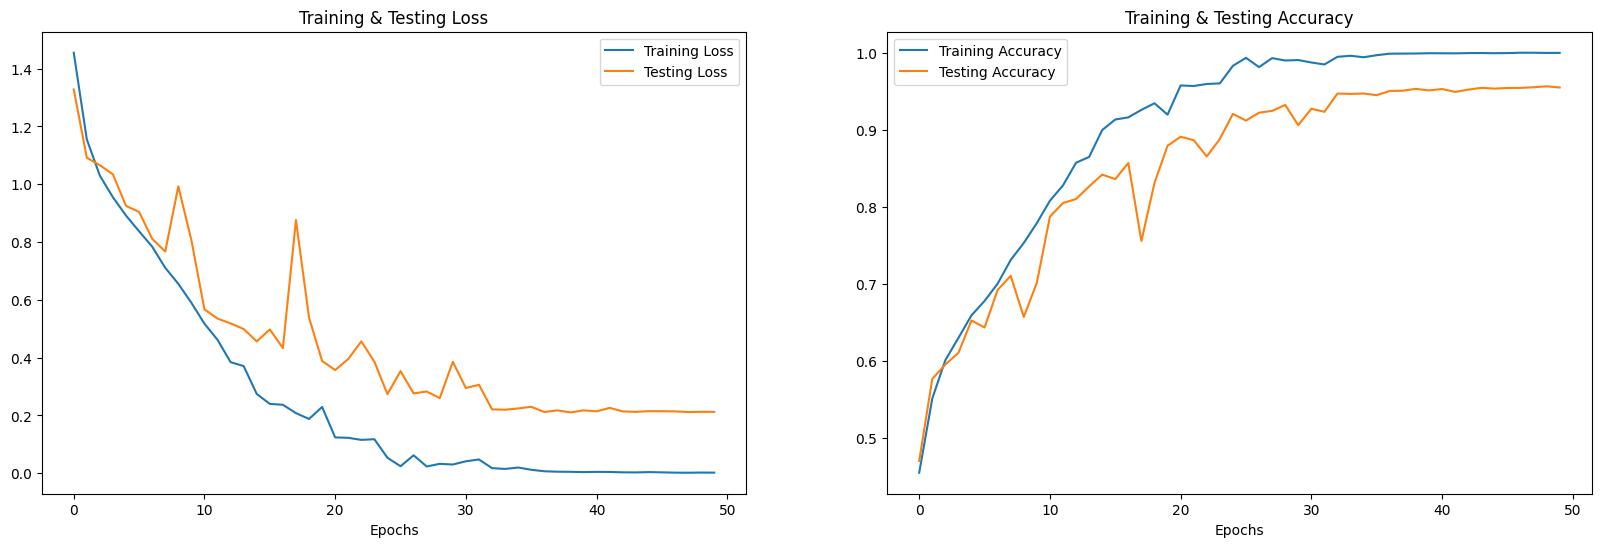

305/305 [==============================] - 7s 22ms/step - loss: 0.2125 - accuracy: 0.9546
CNN-LSTM Accuracy Model:  0.9545735120773315


In [ ]:
model_file = 'cnnlstmmodel2.h5'
cnnlstm = train_cnnlstm(model_file, X_train, y_train, X_test, y_test)

### Test Prediction

In [ ]:
pred = cnnlstm.predict(X_test)
pred = encoder.inverse_transform(pred)
test = encoder.inverse_transform(y_test)

TestData = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
TestData['Predicted Labels'] = pred.flatten()
TestData['Actual Labels'] = test.flatten()

TestData.head(20)

305/305 [==============================] - 7s 20ms/step


Predicted Labels Actual Labels
0               sad           sad
1             happy         happy
2              fear          fear
3             angry         angry
4             angry         angry
5              fear          fear
6           disgust       disgust
7           neutral       neutral
8          surprise      surprise
9           neutral           sad
10          neutral       neutral
11            angry         angry
12            angry         angry
13          disgust       disgust
14             fear          fear
15            angry         angry
16            angry         angry
17          neutral       neutral
18            angry         angry
19          disgust       disgust

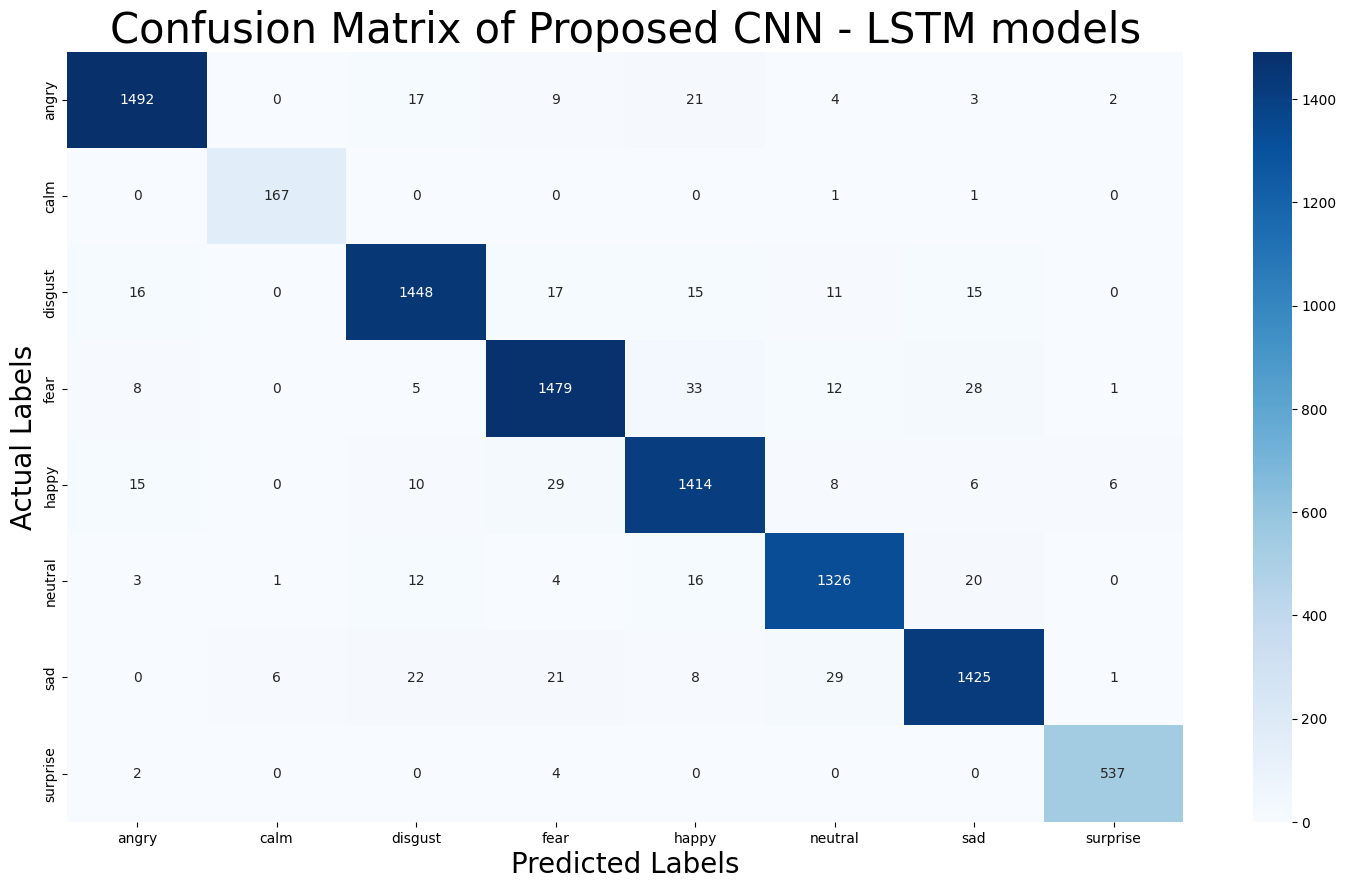

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(test, pred)
plt.figure(figsize = (18, 10))
cm = pd.DataFrame(cm, index = [i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, cmap='Blues', annot = True, fmt = '.0f', linecolor='white')
plt.title('Confusion Matrix of Proposed CNN - LSTM models', size = 30)
plt.xlabel('Predicted Labels', size = 20)
plt.ylabel('Actual Labels', size = 20)
plt.show()

In [ ]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

       angry       0.97      0.96      0.97      1548
        calm       0.96      0.99      0.97       169
     disgust       0.96      0.95      0.95      1522
        fear       0.95      0.94      0.95      1566
       happy       0.94      0.95      0.94      1488
     neutral       0.95      0.96      0.96      1382
         sad       0.95      0.94      0.95      1512
    surprise       0.98      0.99      0.99       543

    accuracy                           0.95      9730
   macro avg       0.96      0.96      0.96      9730
weighted avg       0.95      0.95      0.95      9730



## AlexNet Arcitecture

### Model

In [ ]:
def train_alex(model_file, x_train, y_train, x_test, y_test):
    if os.path.exists(model_file):
        model = tf.keras.models.load_model(model_file)
        print("Model loaded successfully.")
        return model
    else:
        model_checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', save_best_only=True)
        early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

        x_traincnn = np.expand_dims(x_train, axis=2)
        x_testcnn = np.expand_dims(x_test, axis=2)

        model = Sequential()
        model.add(Conv1D(96, 11, strides=4, padding='same', input_shape=(2376, 1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=3, strides=2))

        # Convolution Layer 2
        model.add(Conv1D(256, 5, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=3, strides=2))

        # Convolution Layer 3
        model.add(Conv1D(384, 3, padding='same'))
        model.add(Activation('relu'))

        # Convolution Layer 4
        model.add(Conv1D(384, 3, padding='same'))
        model.add(Activation('relu'))

        # Convolution Layer 5
        model.add(Conv1D(256, 3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=3, strides=2))

        # Flatten the network
        model.add(Flatten())

        # Fully Connected Layer 1
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))

        # Fully Connected Layer 2
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))

        # Fully Connected Layer 3
        model.add(Dense(8))
        model.add(Activation('softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,
                            callbacks=[early_stop, lr_reduction, model_checkpoint])

        # Plotting
        epoch = [i for i in range(len(history.history['accuracy']))]
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20, 6)

        ax[0].plot(epoch, history.history['loss'], label='Training Loss')
        ax[0].plot(epoch, history.history['val_loss'], label='Testing Loss')
        ax[0].set_title('Training & Testing Loss')
        ax[0].legend()
        ax[0].set_xlabel('Epochs')

        ax[1].plot(epoch, history.history['accuracy'], label='Training Accuracy')
        ax[1].plot(epoch, history.history['val_accuracy'], label='Testing Accuracy')
        ax[1].set_title('Training & Testing Accuracy')
        ax[1].legend()
        ax[1].set_xlabel('Epochs')

        plt.show()

    print('AlexNet Accuracy Model: ', model.evaluate(x_testcnn, y_test)[1])

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 594, 96)           1152      
                                                                 
 activation (Activation)     (None, 594, 96)           0         
                                                                 
 batch_normalization (BatchN  (None, 594, 96)          384       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 296, 96)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 256)          123136    
                                                                 
 activation_1 (Activation)   (None, 296, 256)          0

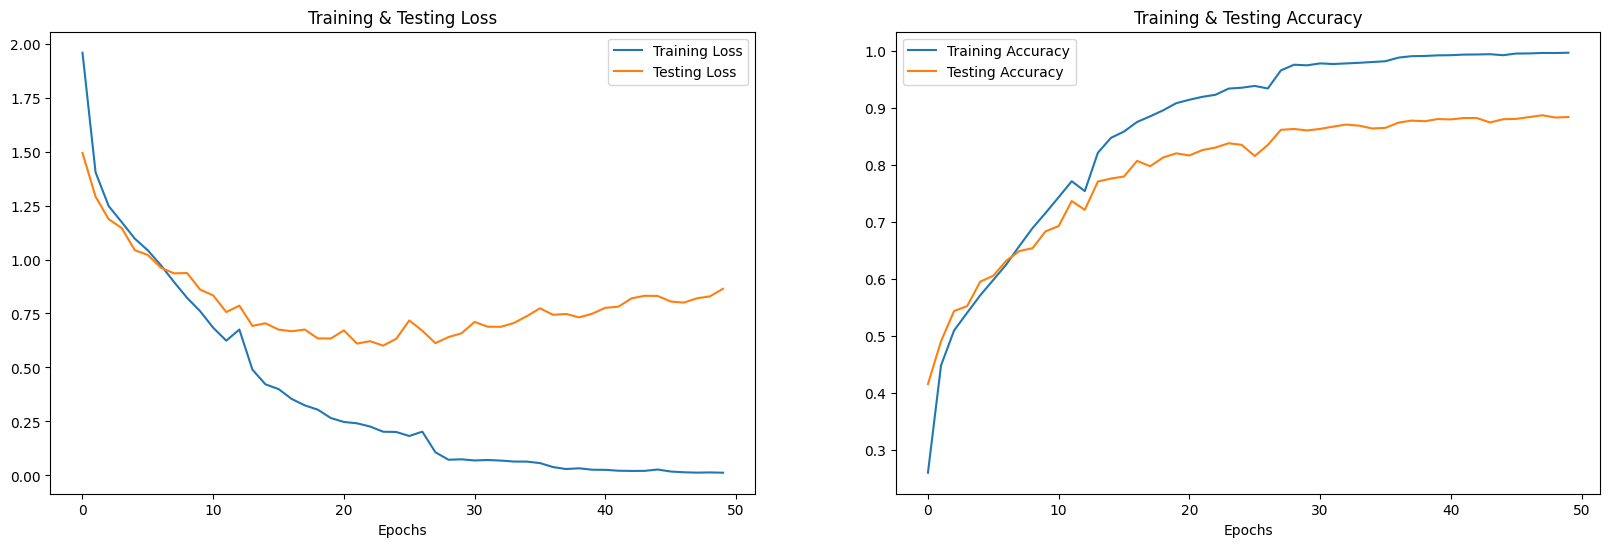

305/305 [==============================] - 2s 7ms/step - loss: 0.8644 - accuracy: 0.8836
AlexNet Accuracy Model:  0.8835560083389282


In [ ]:
model_file = 'alexmodel.h5'
alex = train_alex(model_file, X_train, y_train, X_test, y_test)

### Test Prediction

In [ ]:
pred = alex.predict(X_test)
pred = encoder.inverse_transform(pred)
test = encoder.inverse_transform(y_test)

TestData = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
TestData['Predicted Labels'] = pred.flatten()
TestData['Actual Labels'] = test.flatten()

TestData.head(20)

305/305 [==============================] - 2s 6ms/step


Predicted Labels Actual Labels
0               sad           sad
1             happy         happy
2              fear          fear
3             angry         angry
4             angry         angry
5              fear          fear
6           disgust       disgust
7           neutral       neutral
8          surprise      surprise
9             happy           sad
10          disgust       neutral
11            angry         angry
12            angry         angry
13          disgust       disgust
14          disgust          fear
15            angry         angry
16            angry         angry
17          neutral       neutral
18            angry         angry
19              sad       disgust

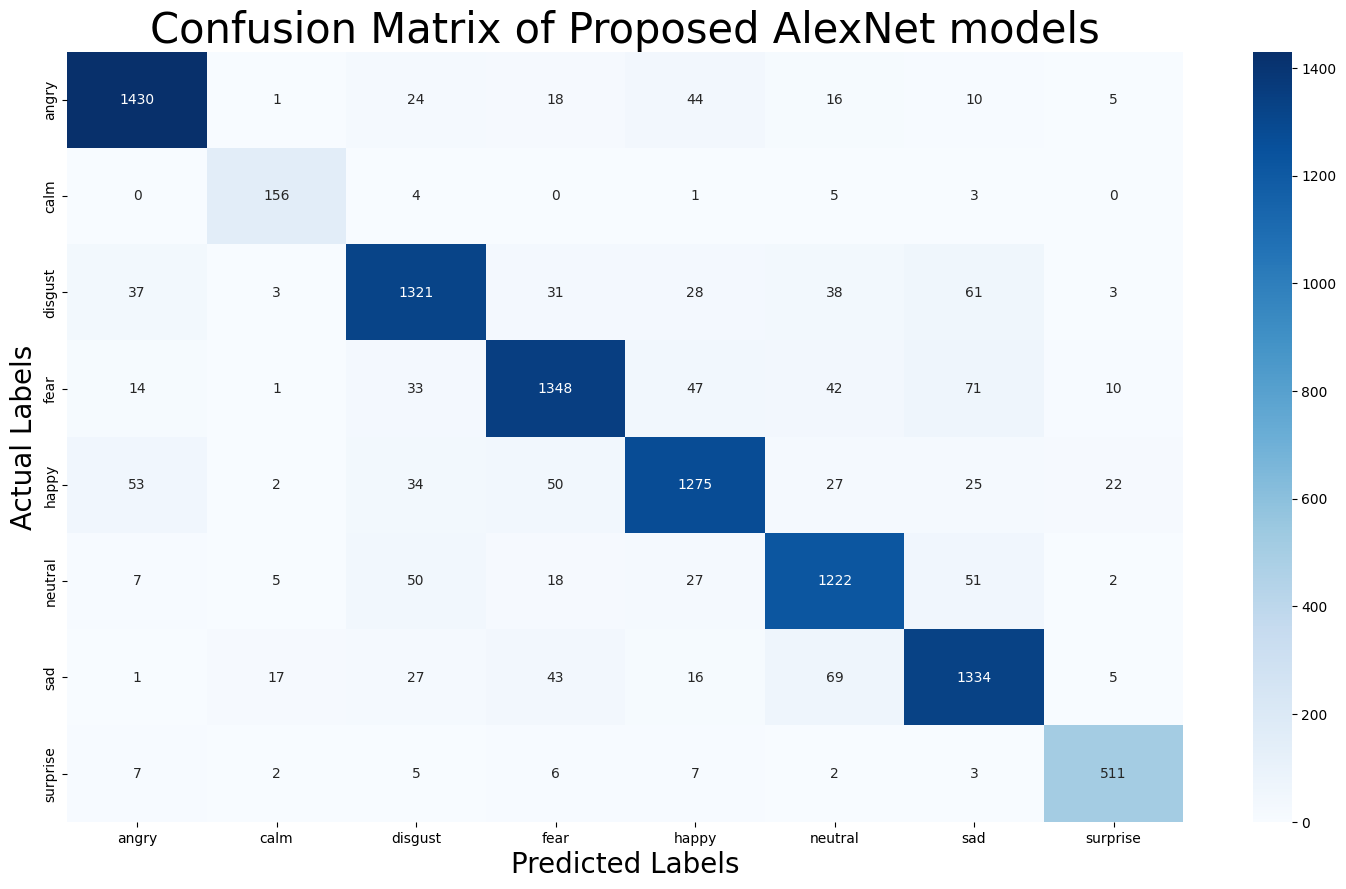

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(test, pred)
plt.figure(figsize = (18, 10))
cm = pd.DataFrame(cm, index = [i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, cmap='Blues', annot = True, fmt = '.0f', linecolor='white')
plt.title('Confusion Matrix of Proposed AlexNet models', size = 30)
plt.xlabel('Predicted Labels', size = 20)
plt.ylabel('Actual Labels', size = 20)
plt.show()

In [ ]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

       angry       0.92      0.92      0.92      1548
        calm       0.83      0.92      0.88       169
     disgust       0.88      0.87      0.87      1522
        fear       0.89      0.86      0.88      1566
       happy       0.88      0.86      0.87      1488
     neutral       0.86      0.88      0.87      1382
         sad       0.86      0.88      0.87      1512
    surprise       0.92      0.94      0.93       543

    accuracy                           0.88      9730
   macro avg       0.88      0.89      0.89      9730
weighted avg       0.88      0.88      0.88      9730



## VGG - 16

### Model

In [63]:
def train_vgg16(model_file, x_train, y_train, x_test, y_test):
    if os.path.exists(model_file):
        model = tf.keras.models.load_model(model_file)
        print("Model loaded successfully.")
        return model
    else:
        model_checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', save_best_only=True)
        early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

        x_traincnn = np.expand_dims(x_train, axis=2)
        x_testcnn = np.expand_dims(x_test, axis=2)

        model = Sequential()

        # Block 1
        model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=(2376, 1)))
        model.add(Conv1D(64, 3, activation='relu', padding='same'))
        model.add(MaxPooling1D(2, strides=2))

        # Block 2
        model.add(Conv1D(128, 3, activation='relu', padding='same'))
        model.add(Conv1D(128, 3, activation='relu', padding='same'))
        model.add(MaxPooling1D(2, strides=2))

        # Block 3
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(MaxPooling1D(2, strides=2))

        # Block 4
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(MaxPooling1D(2, strides=2))

        # Block 5
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(MaxPooling1D(2, strides=2))

        # Flatten the network
        model.add(Flatten())

        # Fully Connected layers
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(8, activation='softmax'))  # 8 output classes

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,
                            callbacks=[early_stop, lr_reduction, model_checkpoint])

        # Plotting
        epoch = [i for i in range(len(history.history['accuracy']))]
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20, 6)

        ax[0].plot(epoch, history.history['loss'], label='Training Loss')
        ax[0].plot(epoch, history.history['val_loss'], label='Testing Loss')
        ax[0].set_title('Training & Testing Loss')
        ax[0].legend()
        ax[0].set_xlabel('Epochs')

        ax[1].plot(epoch, history.history['accuracy'], label='Training Accuracy')
        ax[1].plot(epoch, history.history['val_accuracy'], label='Testing Accuracy')
        ax[1].set_title('Training & Testing Accuracy')
        ax[1].legend()
        ax[1].set_xlabel('Epochs')

        plt.show()

    print('VGG-16 Accuracy Model: ', model.evaluate(x_testcnn, y_test)[1])

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 64)          256       
                                                                 
 conv1d_1 (Conv1D)           (None, 2376, 64)          12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 64)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 1188, 128)         24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 1188, 128)         49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 594, 128)         0         
 1D)                                                    

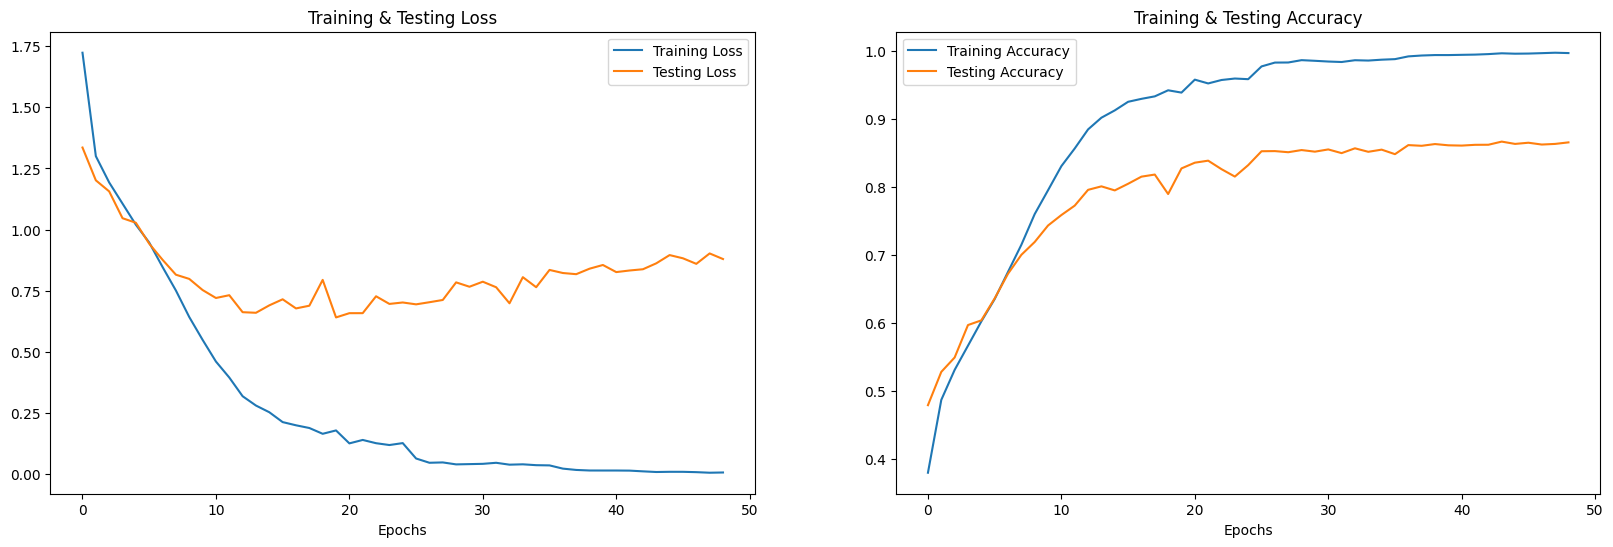

305/305 [==============================] - 9s 29ms/step - loss: 0.8624 - accuracy: 0.8670
VGG-16 Accuracy Model:  0.8670092225074768


In [64]:
model_file = 'vgg16.h5'
cnnlstm = train_vgg16(model_file, X_train, y_train, X_test, y_test)

### Test Prediction

In [66]:
pred = cnnlstm.predict(X_test)
pred = encoder.inverse_transform(pred)
test = encoder.inverse_transform(y_test)

TestData = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
TestData['Predicted Labels'] = pred.flatten()
TestData['Actual Labels'] = test.flatten()

TestData.head(20)

305/305 [==============================] - 7s 23ms/step


Predicted Labels Actual Labels
0               sad           sad
1             happy         happy
2              fear          fear
3             angry         angry
4             angry         angry
5              fear          fear
6           disgust       disgust
7           neutral       neutral
8          surprise      surprise
9              fear           sad
10          neutral       neutral
11            angry         angry
12            angry         angry
13          disgust       disgust
14          neutral          fear
15            angry         angry
16            angry         angry
17          neutral       neutral
18            angry         angry
19          neutral       disgust

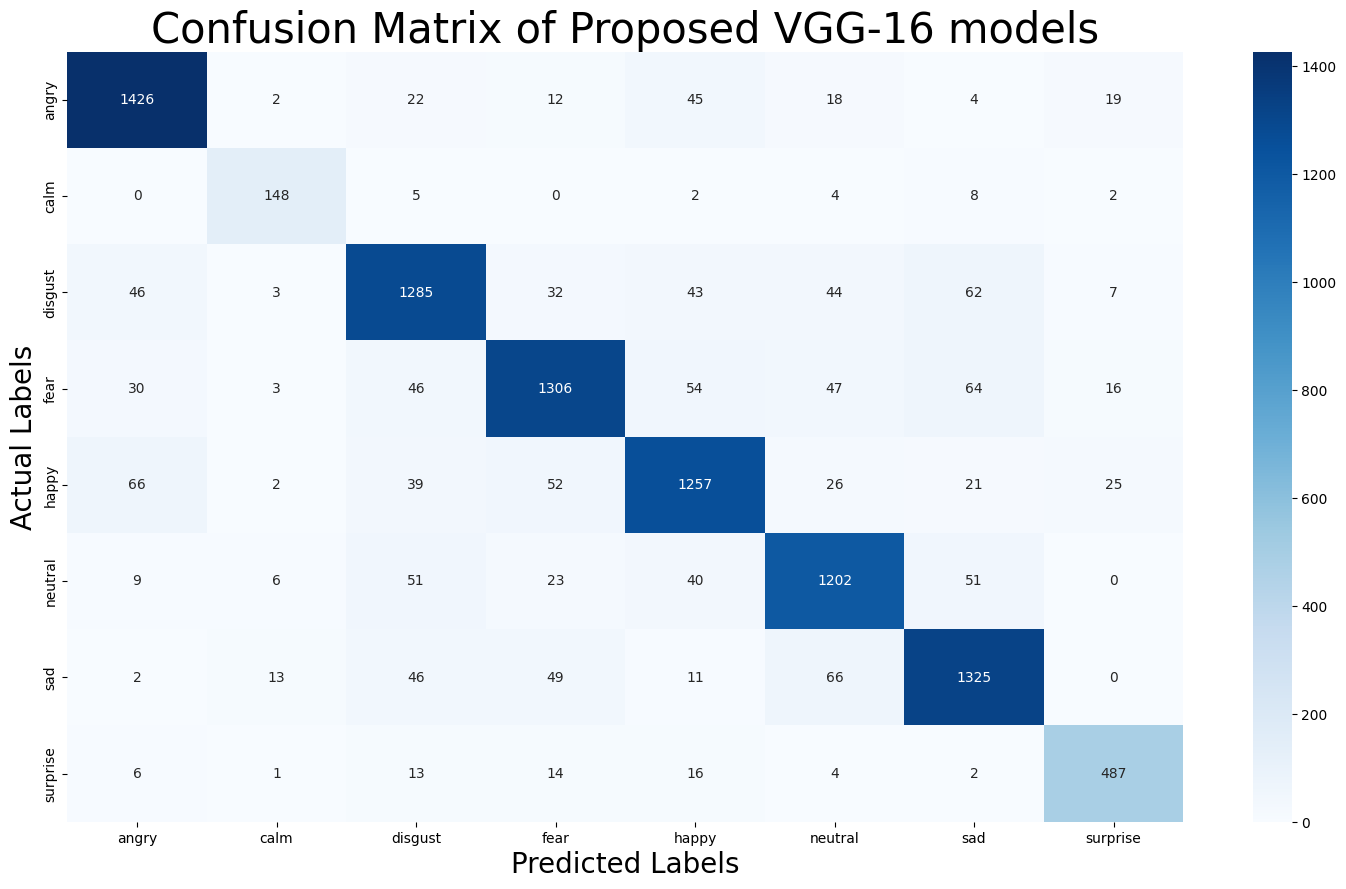

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(test, pred)
plt.figure(figsize = (18, 10))
cm = pd.DataFrame(cm, index = [i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, cmap='Blues', annot = True, fmt = '.0f', linecolor='white')
plt.title('Confusion Matrix of Proposed VGG-16 models', size = 30)
plt.xlabel('Predicted Labels', size = 20)
plt.ylabel('Actual Labels', size = 20)
plt.show()

In [68]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

       angry       0.90      0.92      0.91      1548
        calm       0.83      0.88      0.85       169
     disgust       0.85      0.84      0.85      1522
        fear       0.88      0.83      0.86      1566
       happy       0.86      0.84      0.85      1488
     neutral       0.85      0.87      0.86      1382
         sad       0.86      0.88      0.87      1512
    surprise       0.88      0.90      0.89       543

    accuracy                           0.87      9730
   macro avg       0.86      0.87      0.87      9730
weighted avg       0.87      0.87      0.87      9730

